# Data Filtering and Selection

In [581]:
import pandas as pd
import numpy as np

from pandas import DataFrame

In [537]:
number_df = DataFrame (np.arange(0, 90, 3).reshape(10,3), index= ['row 1','row 2','row 3','row 4','row 5','row 6','row 7','row 8','row 9','row 10'], columns=['Col 1','Col 2','Col 3'])

number_df

,Col 1,Col 2,Col 3
row 1,0,3,6
row 2,9,12,15
row 3,18,21,24
row 4,27,30,33
row 5,36,39,42
row 6,45,48,51
row 7,54,57,60
row 8,63,66,69
row 9,72,75,78
row 10,81,84,87


**Indexing**

In [538]:
number_df.iloc[0,1]

3

**Replacing**

In [539]:
number_df.iloc [0,1] = 20

number_df

,Col 1,Col 2,Col 3
row 1,0,20,6
row 2,9,12,15
row 3,18,21,24
row 4,27,30,33
row 5,36,39,42
row 6,45,48,51
row 7,54,57,60
row 8,63,66,69
row 9,72,75,78
row 10,81,84,87


**Fancy indexing**

In [540]:
number_df.iloc [[1, 2, 4], [1, 2]]

,Col 2,Col 3
row 2,12,15
row 3,21,24
row 5,39,42


**Bolean Indexing**
#### Comparison operators (> < = <= => == !=) and Masking.

In [541]:
mask_df = number_df > 30

mask_df

,Col 1,Col 2,Col 3
row 1,False,False,False
row 2,False,False,False
row 3,False,False,False
row 4,False,False,True
row 5,True,True,True
row 6,True,True,True
row 7,True,True,True
row 8,True,True,True
row 9,True,True,True
row 10,True,True,True


In [542]:
number_df[mask_df]

,Col 1,Col 2,Col 3
row 1,NaN,NaN,NaN
row 2,NaN,NaN,NaN
row 3,NaN,NaN,NaN
row 4,NaN,NaN,33.0
row 5,36.0,39.0,42.0
row 6,45.0,48.0,51.0
row 7,54.0,57.0,60.0
row 8,63.0,66.0,69.0
row 9,72.0,75.0,78.0
row 10,81.0,84.0,87.0


### Replacing with zero

In [543]:
number_df [number_df > 30] = 0

number_df

,Col 1,Col 2,Col 3
row 1,0,20,6
row 2,9,12,15
row 3,18,21,24
row 4,27,30,0
row 5,0,0,0
row 6,0,0,0
row 7,0,0,0
row 8,0,0,0
row 9,0,0,0
row 10,0,0,0


In [544]:
number_df.iloc [2:6, 1:3]

,Col 2,Col 3
row 3,21,24
row 4,30,0
row 5,0,0
row 6,0,0


# The comparison operators and scalr values

**Missing Data** 

In [545]:
data = {'name': ['steve', 'john', 'richard', 'sarah', 'randy', 'micheal', 'julie'],
        'age': [20,22,20,21,24,23,22],
        'gender': ['Male','Male','Male','Female','Male','Male','Female'],
        'rank': [2,1,4,5,3,7,6]        
        }
ranking_df = DataFrame(data)
ranking_df.iloc[2:5,1] = np.nan
ranking_df.iloc[3:6,3] = np.nan
ranking_df.iloc[3,:] = np.nan

ranking_df

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,NaN,Male,4.0
3,NaN,NaN,NaN,NaN
4,randy,NaN,Male,NaN
5,micheal,23.0,Male,NaN
6,julie,22.0,Female,6.0


In [546]:
# Finding null values

ranking_df.isnull()

,name,age,gender,rank
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,True,True,True,True
4,False,True,False,True
5,False,False,False,True
6,False,False,False,False


In [547]:
ranking_df.notnull()

,name,age,gender,rank
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,False,False,False,False
4,True,False,True,False
5,True,True,True,False
6,True,True,True,True


In [548]:
# find missing value in specific column or row

Bool_series = pd.isnull(ranking_df['age'])
ranking_df[Bool_series]

,name,age,gender,rank
2,richard,NaN,Male,4.0
3,NaN,NaN,NaN,NaN
4,randy,NaN,Male,NaN


### Filling missing values

In [549]:
ranking_df.fillna(0)

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,0.0,Male,4.0
3,0,0.0,0,0.0
4,randy,0.0,Male,0.0
5,micheal,23.0,Male,0.0
6,julie,22.0,Female,6.0


In [550]:
ranking_df.fillna(method='pad')


/tmp/ipykernel_58383/1736850783.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ranking_df.fillna(method='pad')


,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,22.0,Male,4.0
3,richard,22.0,Male,4.0
4,randy,22.0,Male,4.0
5,micheal,23.0,Male,4.0
6,julie,22.0,Female,6.0


In [551]:
ranking_df.fillna(method='bfill')

/tmp/ipykernel_58383/3253257716.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ranking_df.fillna(method='bfill')


,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,23.0,Male,4.0
3,randy,23.0,Male,6.0
4,randy,23.0,Male,6.0
5,micheal,23.0,Male,6.0
6,julie,22.0,Female,6.0


In [552]:
# Linear mathod

ranking_df.interpolate(method='linear')

/tmp/ipykernel_58383/574493641.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ranking_df.interpolate(method='linear')


,name,age,gender,rank
0,steve,20.00,Male,2.0
1,john,22.00,Male,1.0
2,richard,22.25,Male,4.0
3,NaN,22.50,NaN,4.5
4,randy,22.75,Male,5.0
5,micheal,23.00,Male,5.5
6,julie,22.00,Female,6.0


### Drop missing values

In [553]:
ranking_df.dropna()

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
6,julie,22.0,Female,6.0


In [554]:
ranking_df.dropna(how='all')

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,NaN,Male,4.0
4,randy,NaN,Male,NaN
5,micheal,23.0,Male,NaN
6,julie,22.0,Female,6.0


In [555]:
# Drop columns that at least has one missing values

ranking_df.dropna(axis=1)

""
0
1
2
3
4
5
6


In [556]:
# Drop rows that at least has one missing values

ranking_df.dropna(axis=0)

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
6,julie,22.0,Female,6.0


# Removing Duplicates

In [557]:
from pandas import Series

In [558]:
DF_obj = DataFrame({'col1': [1,1,2,2,3,3,3],
                    'col2': ['a','a','b','b','c','c','c',],
                    'col3': ['A','A','B','B','C','C','C',]})

DF_obj

,col1,col2,col3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [559]:
# Search each row and find duplicate values

DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [560]:
# Drop duplicate mathods

DF_obj.drop_duplicates()

,col1,col2,col3
0,1,a,A
2,2,b,B
4,3,c,C


drop duplicate base on columns

In [561]:

DF_obj = DataFrame({'col1': [1,1,2,2,3,3,3],
                    'col2': ['a','a','b','b','c','c','c',],
                    'col3': ['A','A','B','B','C','D','C',]})

DF_obj

,col1,col2,col3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [562]:
DF_obj.drop_duplicates(['col3'])

,col1,col2,col3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


# Concatenating and transforming data

Concatenating data

In [563]:
DF_obj = DataFrame (np.arange(36).reshape(6,6))

DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [564]:
DF_obj_2 = DataFrame (np.arange(15).reshape(5,3))

DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [565]:
# join objects base on row index values

pd.concat ([DF_obj, DF_obj_2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [566]:
# join objects base on columns  values

pd.concat ([DF_obj, DF_obj_2]) # or we can say , axis=0)

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


## Transforming data

In [567]:
# drop data using drop mathod and passing index values for the rows you want to drop

DF_obj.drop([0,2]) # rows in index possion 0 and 2

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


Dropping data

In [568]:
DF_obj.drop([0,2], axis=1) # columns in index posion 0 and 2

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


Adding data

In [569]:
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"

series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int64

In [570]:
variabel_added = DataFrame (DF_obj, series_obj)

variabel_added

,0,1,2,3,4,5
added_variable,,,,,,
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [571]:
# Using concat function to add data

added_datetabel = pd.concat ([variabel_added, variabel_added], ignore_index=False)

added_datetabel

,0,1,2,3,4,5
added_variable,,,,,,
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17


In [572]:
added_datetabel = pd.concat ([variabel_added, variabel_added], ignore_index=True)

added_datetabel

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35
6,0,1,2,3,4,5
7,6,7,8,9,10,11
8,12,13,14,15,16,17
9,18,19,20,21,22,23


Sorting data

In [573]:
DF_sorted = DF_obj.sort_values(by=[5], ascending=[False]) # sort base on column in index position 5

DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


# Data grouping and aggrigation

**Gourping data by column index**

In [574]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [575]:
cars_groups = cars.groupby (cars ['cyl'])
cars_groups.mean(numeric_only=True) # use numeric methos in order to work just wtih numbers


,mpg,disp,hp,drat,wt,qsex,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


# Data Visualazation   

In [576]:
import matplotlib.pyplot as plt
import seaborn as sns

In [577]:
data = {'names': ['steve', 'john', 'richard', 'sarah', 'randy', 'micheal', 'julie'],
        'age': [20,22,20,21,24,23,22],
        'gender': ['Male','Male','Male','Female','Male','Male','Female'],
        'rank': [2,1,4,5,3,7,6]}

df = DataFrame(data)

df

,names,age,gender,rank
0,steve,20,Male,2
1,john,22,Male,1
2,richard,20,Male,4
3,sarah,21,Female,5
4,randy,24,Male,3
5,micheal,23,Male,7
6,julie,22,Female,6


### Matplotlib's Bar Chart

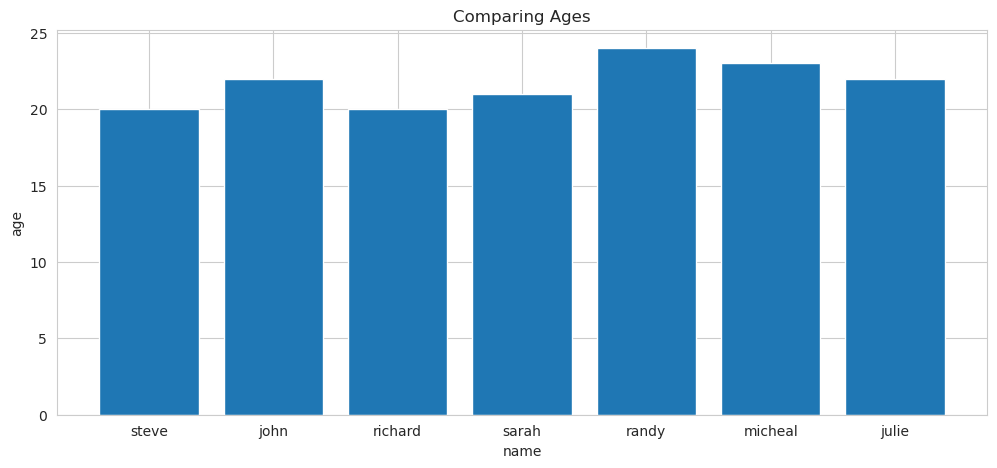

In [578]:
plt.bar (df['names'], df['age'])
plt.xlabel ('name')
plt.ylabel ('age')
plt.title ('Comparing Ages')

plt.show()

AttributeError: 'Axes' object has no attribute 'show'

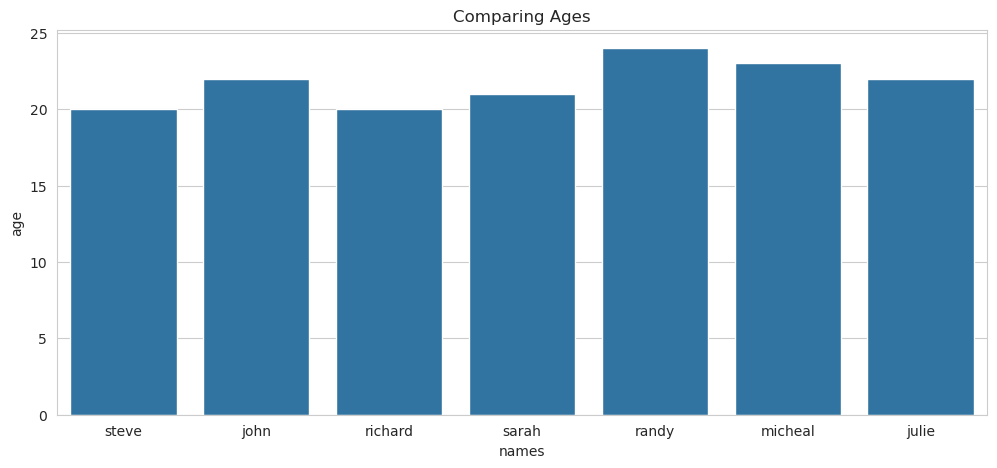

In [579]:
# use seaborn for bar chart
# it more efficiant and more beautiful

plot = sns.barplot (data=df, x = 'names', y = 'age')
plot.set_title ('Comparing Ages')

plot.show()

### Line Plot Matplotlib

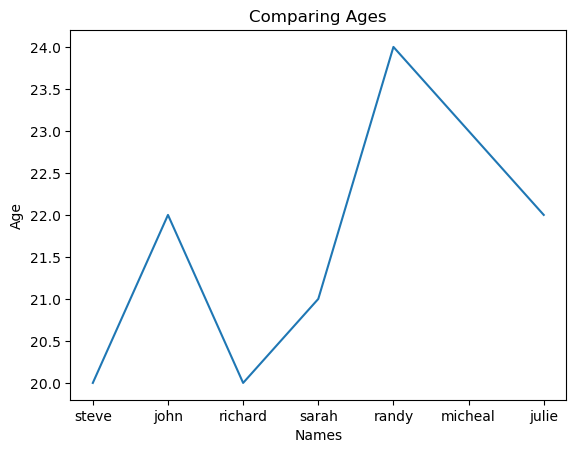

In [ ]:
plt.plot (df['names'], df['age'])
plt.xlabel ("Names")
plt.ylabel ("Age")
plt.title ('Comparing Ages')

plt.show()


### Line Plot Seaborn

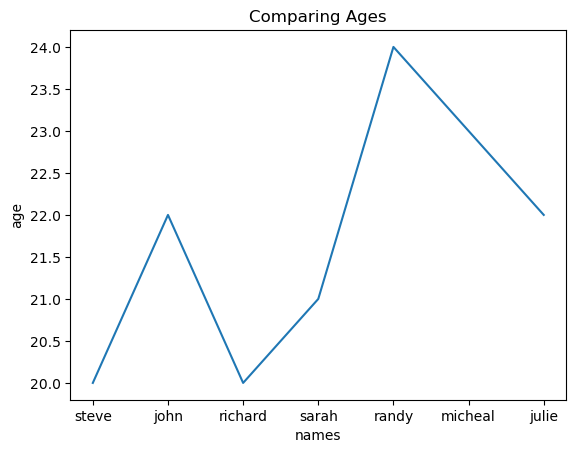

In [ ]:
plot = sns.lineplot (data=df, x='names', y='age')
plot.set_title ('Comparing Ages')

plt.show()

### Pie Chart Matplotlib

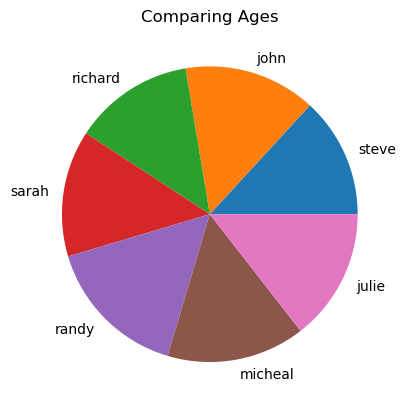

In [ ]:
plt.pie (df['age'], labels= df['names'])
plt.title ("Comparing Ages")

plt.show()

### Pie chart Seaborn

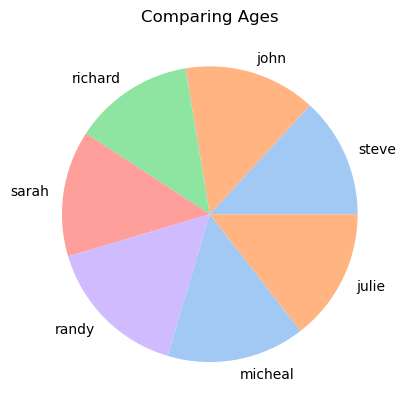

In [ ]:
# does not have pie chart but

colors = sns.color_palette ('pastel')[0:5]

# using Matplotlib 

plt.pie (df['age'], labels= df['names'], colors= colors)
plt.title ('Comparing Ages')

plt.show()

### Creating a line chart from a list object

In [ ]:
from numpy.random import randn

from matplotlib import rcParams

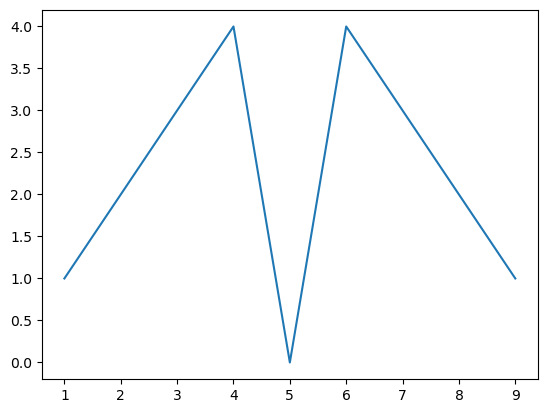

In [ ]:
x = range (1, 10)
y = [1, 2, 3, 4, 0, 4, 3, 2, 1]
plt.plot(x, y)

### Plotting a line chart in matplotlib

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

mpg = cars['mpg'] # isolating mpg



<Axes: >

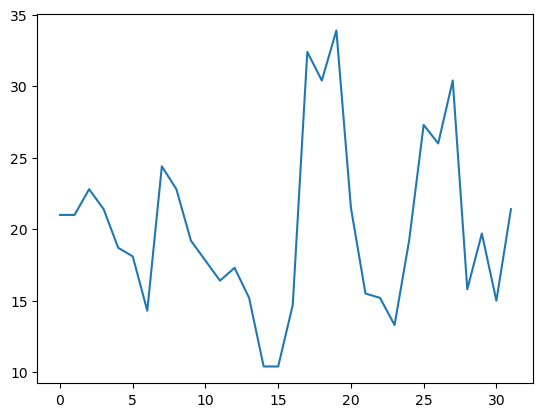

In [ ]:
mpg.plot()

<Axes: >

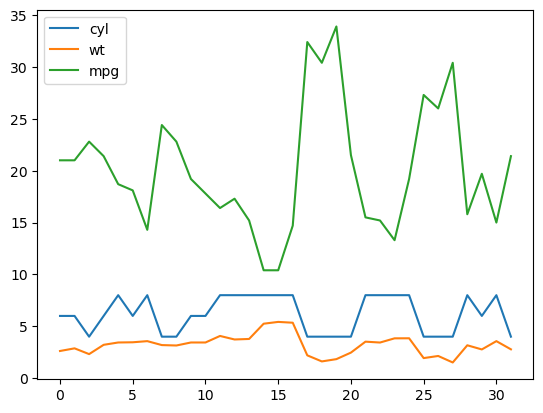

In [ ]:
df = cars [['cyl', 'wt', 'mpg']]
df.plot()

# Creating bar charts

### Creating a bar chart from a list

<BarContainer object of 9 artists>

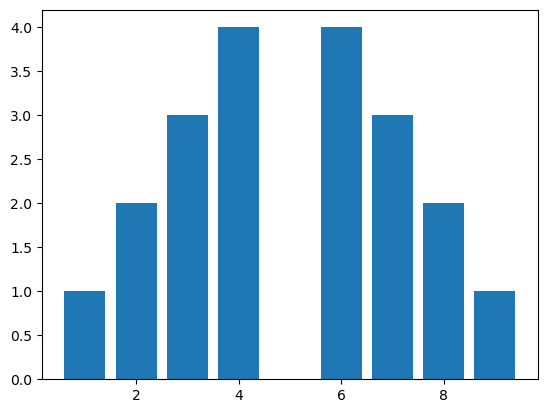

In [ ]:
plt.bar (x, y)

<Axes: >

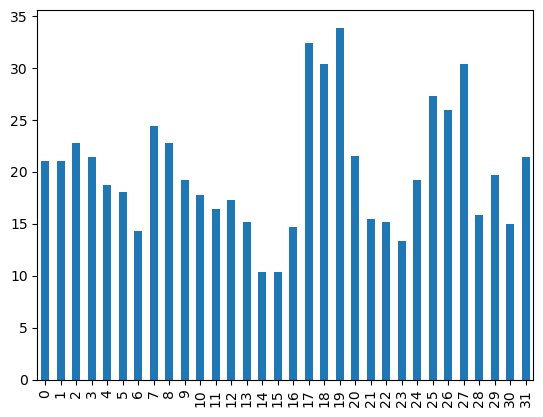

In [ ]:
mpg.plot(kind='bar')

<Axes: >

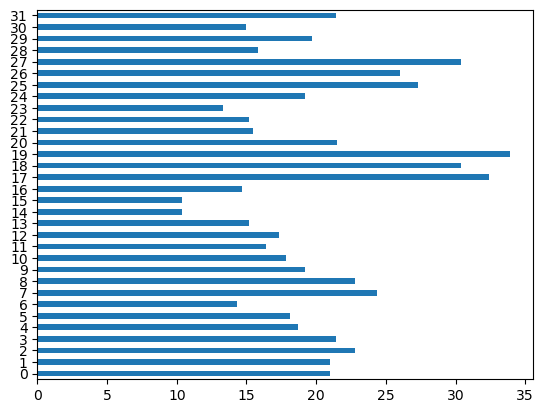

In [ ]:
mpg.plot(kind='barh')

# Ceating a pie chart


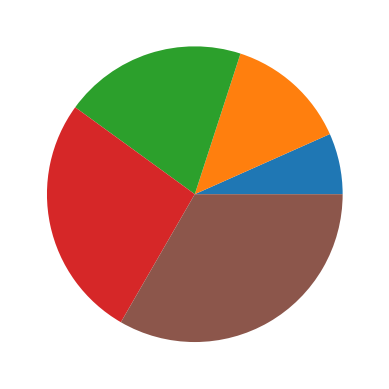

In [ ]:
x = [1,2,3,4,0,5]
plt.pie(x)

plt.show()

### Saving a plot

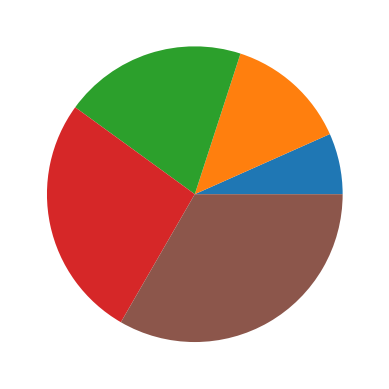

In [ ]:
plt.pie(x)

plt.savefig ('Pie_chart.png')

plt.show()

# Defining elements of a plot 

### Object-oriented method

In [ ]:
# figure size and inline settings for your matplotlib plots 

%matplotlib inline
rcParams ['figure.figsize']=5,4 # inches


### Defining axes, ticks and grids

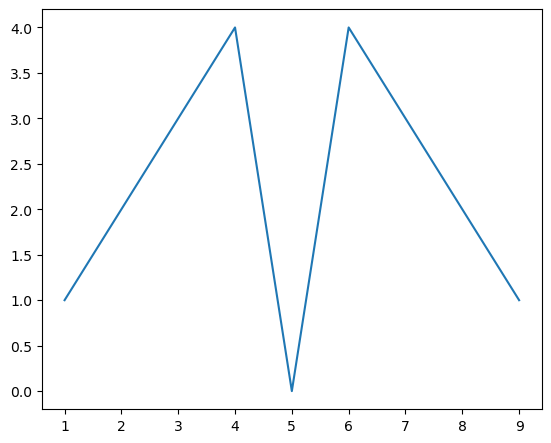

In [ ]:
x = range (1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x, y)

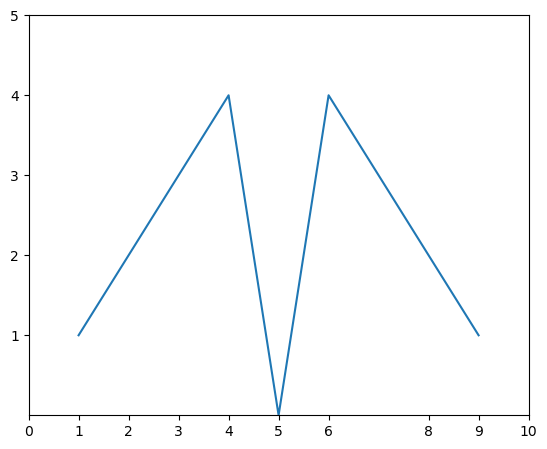

In [ ]:
# limits and tick marks

x = range (1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim ([1,9])
ax.set_ylim ([0,5])

ax.set_xticks([0,1,2,3,4,5,6,8,9,10])
ax.set_yticks([1,2,3,4,5])

ax.plot(x, y)

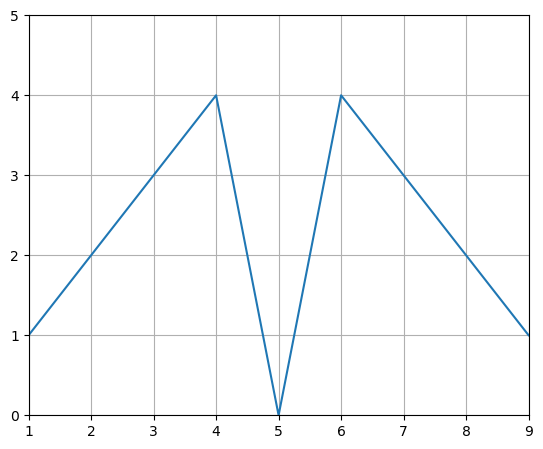

In [ ]:

x = range (1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim ([1,9])
ax.set_ylim ([0,5])

ax.grid()


ax.plot(x, y)

### Generating multiple plots in one figure with subplots

<Figure size 500x400 with 0 Axes>

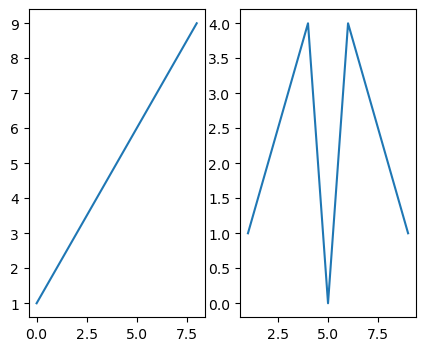

In [ ]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x)
ax2.plot(x,y)

# Plot Formatting Overview

In [ ]:
sns.set_style ('whitegrid')

### Defining plot color

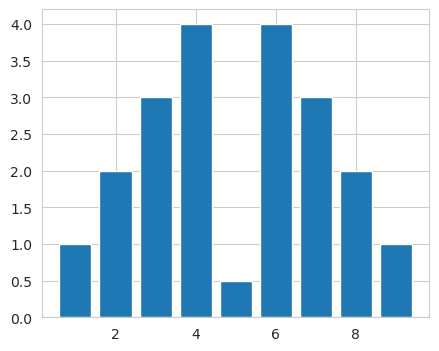

In [ ]:
x = range (1,10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x, y)
plt.show()

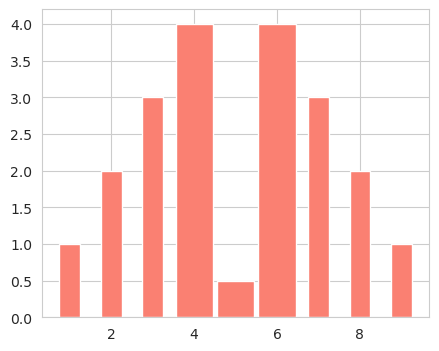

In [ ]:
wide = [0.5,0.5,0.5,0.9,0.9,0.9,0.5,0.5,0.5]
color = ['salmon'] # colort lable

plt.bar (x, y, width=wide , color=color, align='center')
plt.show()

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

mpg = cars['mpg'] # isolating mpg



<Axes: >

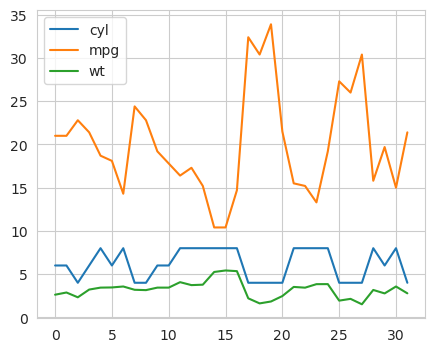

In [ ]:
df = cars[['cyl', 'mpg', 'wt']]
df.plot()

<Axes: >

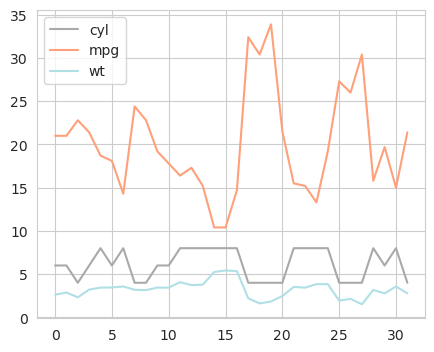

In [ ]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']

df.plot(color=color_theme)

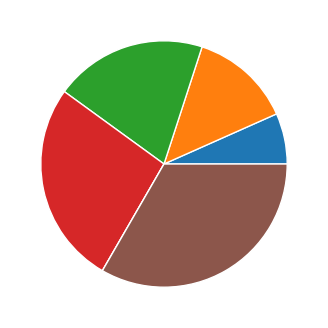

In [ ]:
z = [1,2,3,4,0,5]

plt.pie(z)

plt.show()

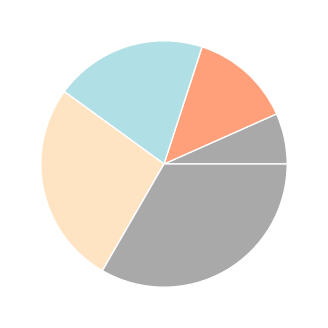

In [ ]:
color_theme = ['#A9A9A9', '#FFA07A' , '#B0E0E6', '#FFE4C4', '#BDB76B'] # RGB codes

plt.pie (z, colors = color_theme)

plt.show()

### Customizing line styles

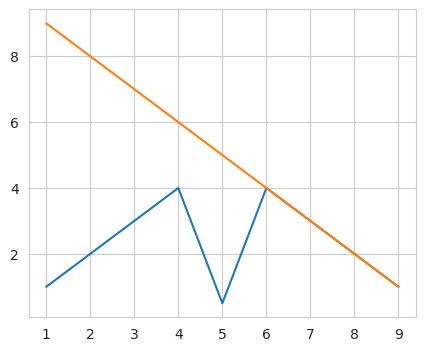

In [ ]:
x1 = range (1,10)
y1 = [9,8,7,6,5,4,3,2,1]

plt.plot(x , y)
plt.plot(x1 , y1)

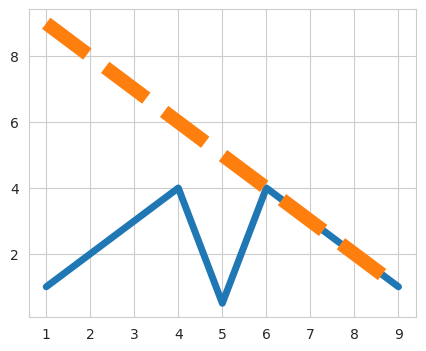

In [ ]:
plt.plot(x , y, ls='solid', lw=5)
plt.plot(x1 , y1, ls='--', lw=10)

### Setting plot markers

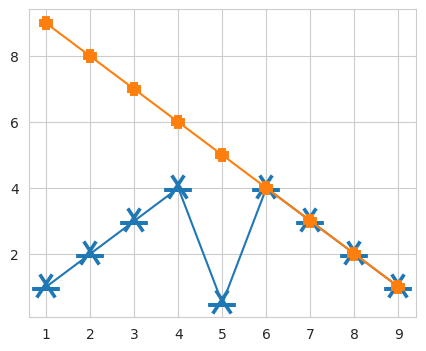

In [ ]:
plt.plot(x , y, marker = '1', mew= 20)
plt.plot(x1 , y1, marker = '+', mew= 10)

# Labels and Annotations Overview

In [ ]:
rcParams['figure.figsize'] = 12,4

### Labeling plot features

***The funcational method***

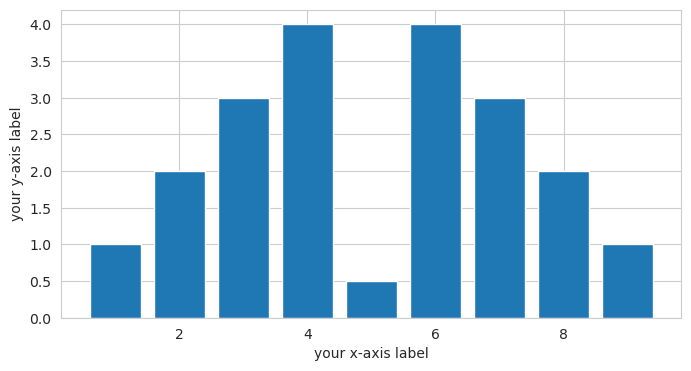

In [ ]:
x = range (1,10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x, y)

plt.xlabel ('your x-axis label')
plt.ylabel ('your y-axis label')

plt.show()

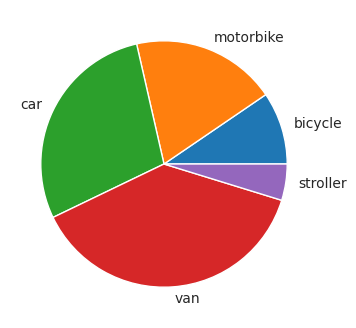

In [ ]:
z = [1,2,3,4,0.5]
veh_type = ['bicycle', 'motorbike' ,'car', 'van', 'stroller'] #label type

plt.pie (z, labels=veh_type)

plt.show()

***The object-oriented method***

Text(0, 0.5, 'Miles/Gal')

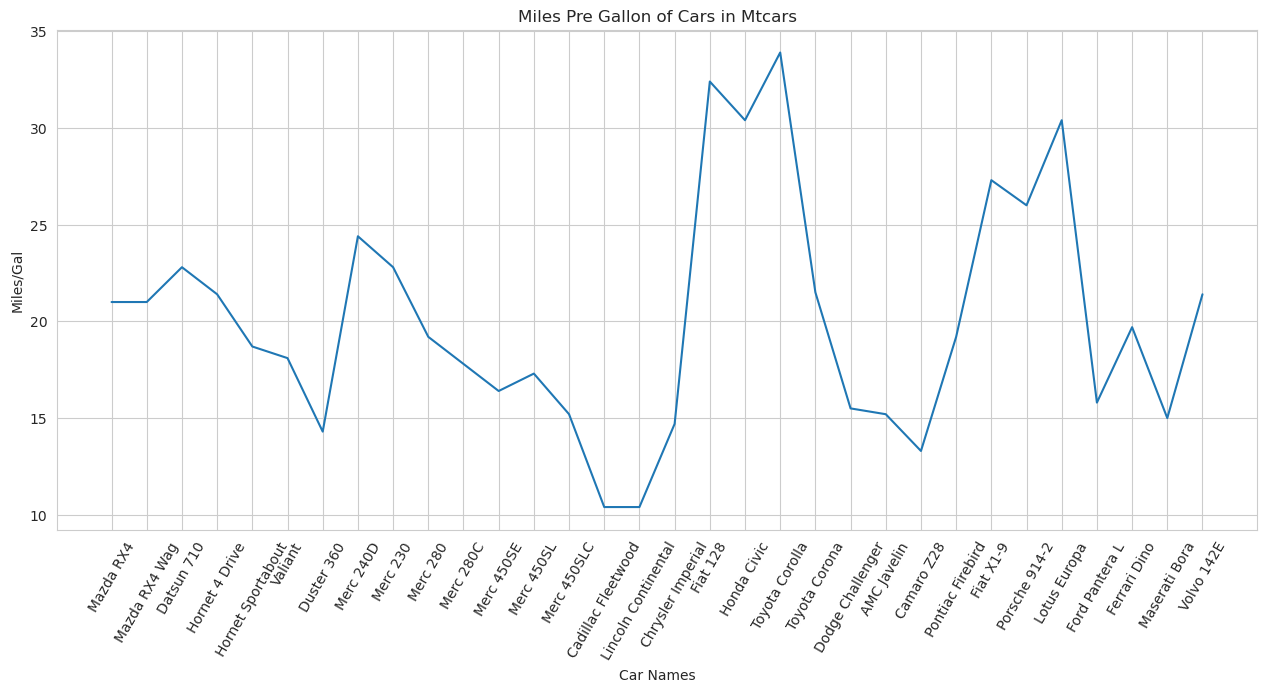

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

mpg = cars.mpg

rcParams ['figure.figsize']= 12,5

fig = plt.figure()
ax = fig.add_axes ([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')

ax.set_title ('Miles Pre Gallon of Cars in Mtcars')

ax.set_xlabel('Car Names')
ax.set_ylabel('Miles/Gal')

# plt.savefig('test')

### Adding a legend to your plot
***The functional method***

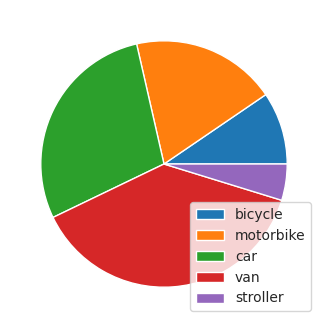

In [ ]:
plt.pie (z)
plt.legend (veh_type, loc='best')

plt.show()

***The object-oriented method***

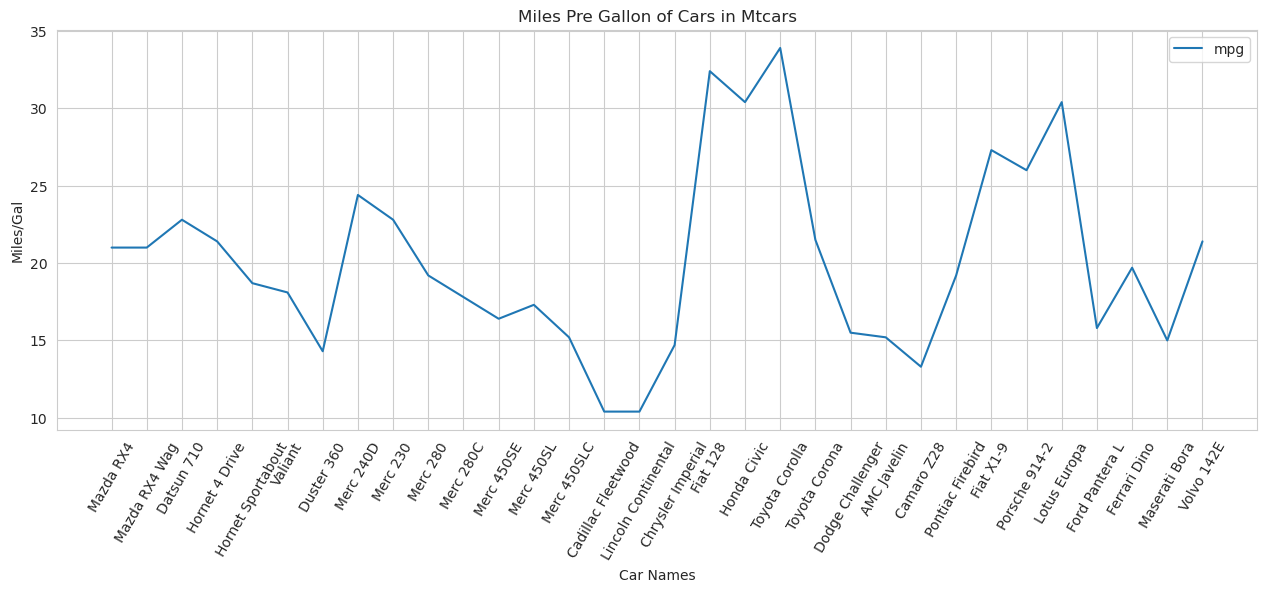

In [ ]:
fig = plt.figure()
ax = fig.add_axes ([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')

ax.set_title ('Miles Pre Gallon of Cars in Mtcars')

ax.set_xlabel('Car Names')
ax.set_ylabel('Miles/Gal')

ax.legend (loc='best')

***Annotating your plot***

In [ ]:
mpg.max()

33.9

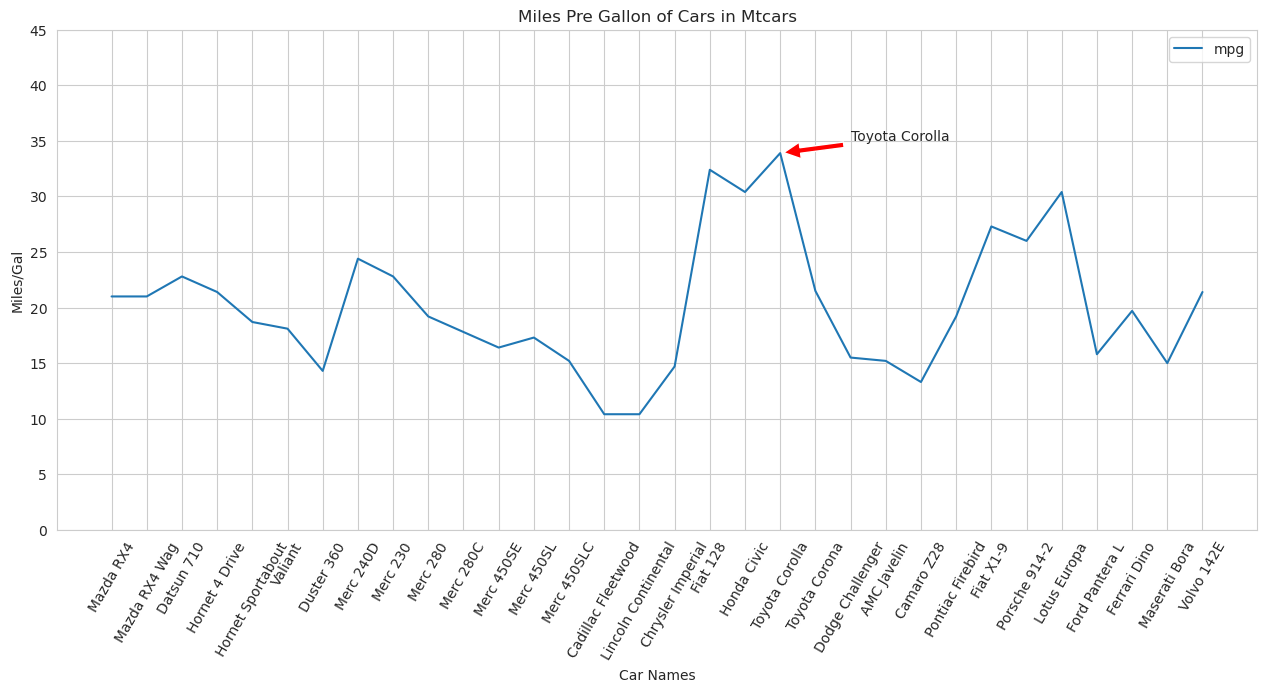

In [ ]:
fig = plt.figure()
ax = fig.add_axes ([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')

ax.set_title ('Miles Pre Gallon of Cars in Mtcars')

ax.set_xlabel('Car Names')
ax.set_ylabel('Miles/Gal')

ax.set_ylim ([0,45])

ax.annotate('Toyota Corolla', xy=(19,33.9), xytext=(21,35), arrowprops=dict(facecolor='red', shrink=0.05))

ax.legend(loc='best')

# The simple Time series plot


In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/Superstore-Sales.csv'

df = pd.read_csv(address,  index_col= 'Order Date',encoding='cp1252', parse_dates=True)

df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<Axes: xlabel='Order Date'>

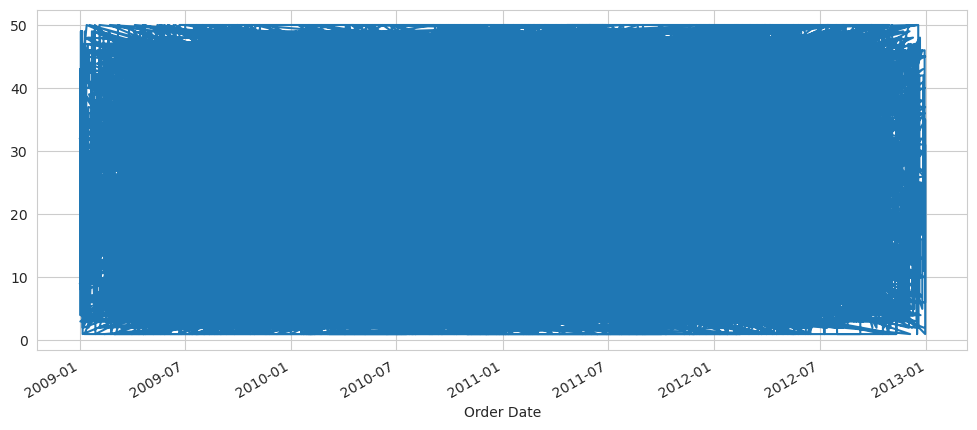

In [ ]:
df['Order Quantity'].plot()

<Axes: title={'center': 'Super_Sales'}, xlabel='Order Date', ylabel='Order Quntity'>

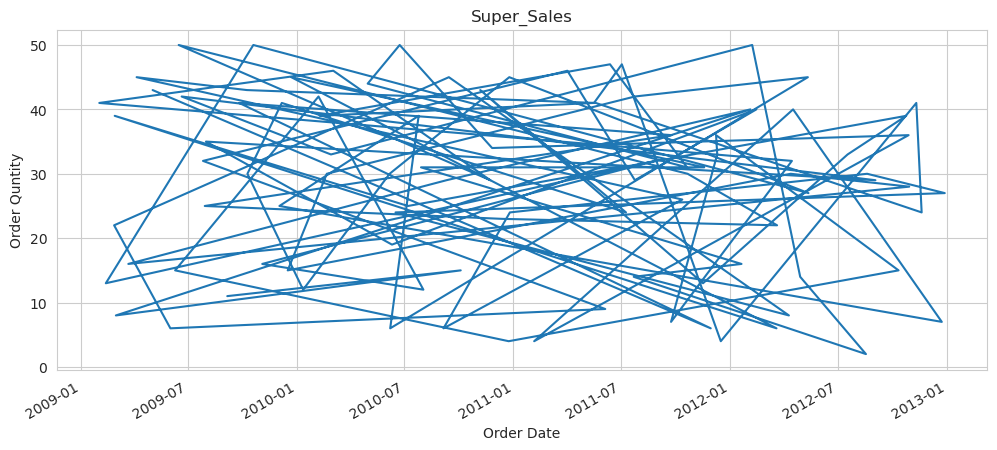

In [ ]:

# make a small sample of data frame

df2 = df.sample(n=100, random_state=25, axis=0) # this method make a small sample randomly but because I wanted to get same result of the study  I set seed for it  "random_state=y5"

plt.xlabel ('Order Date')
plt.ylabel ('Order Quntity')


plt.title ('Super_Sales')

df2['Order Quantity'].plot()



# Eyeballing dataset distributions with histograms

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

cars.index = cars.car_names

mpg = cars['mpg']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: ylabel='Frequency'>

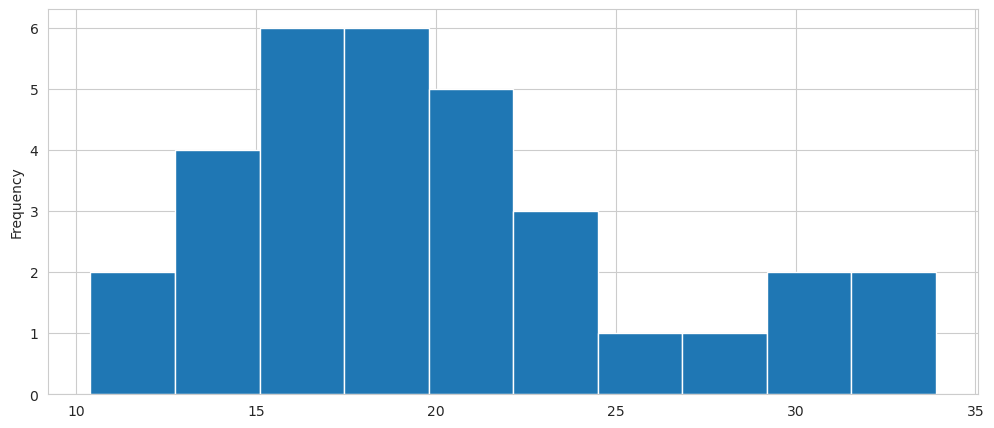

In [ ]:
mpg.plot(kind='hist')


[]

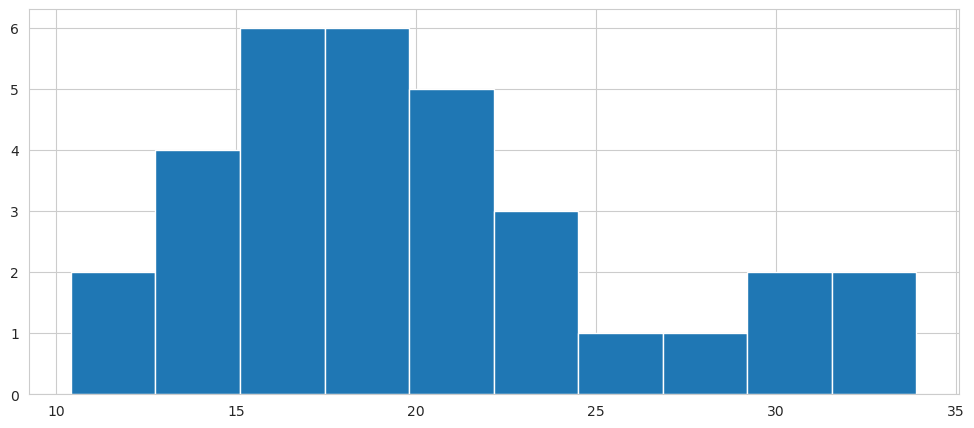

In [ ]:
# Different way to make histogram plot
plt.hist(mpg)
plt.plot()

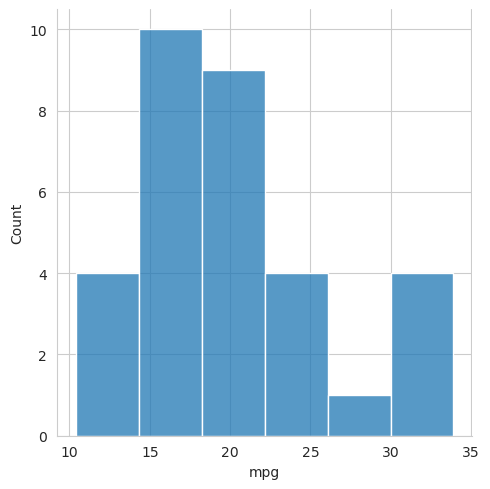

In [ ]:
# Create histogram with seaborn

sns.displot(mpg)

<Axes: xlabel='hp', ylabel='mpg'>

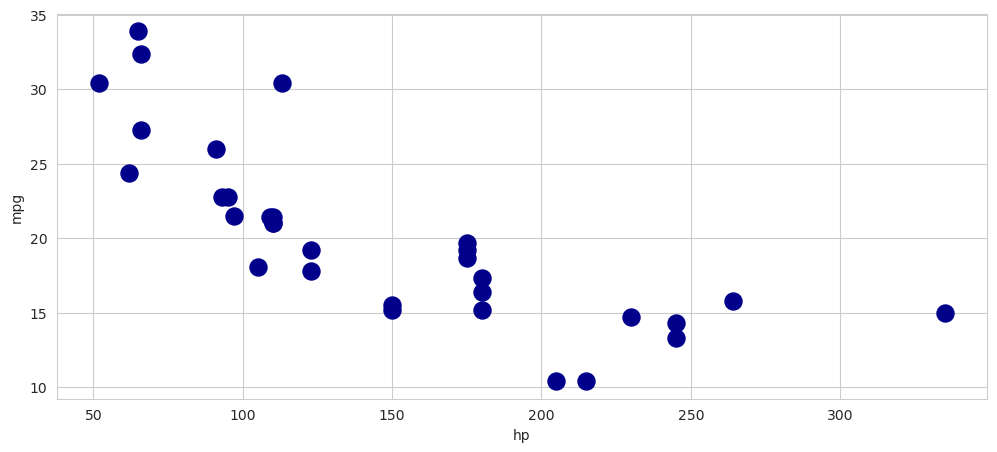

In [ ]:
# Matplotlib for scatter
cars.plot (kind='scatter',x='hp', y='mpg', c='Darkblue', s=150)

<Axes: xlabel='hp', ylabel='mpg'>

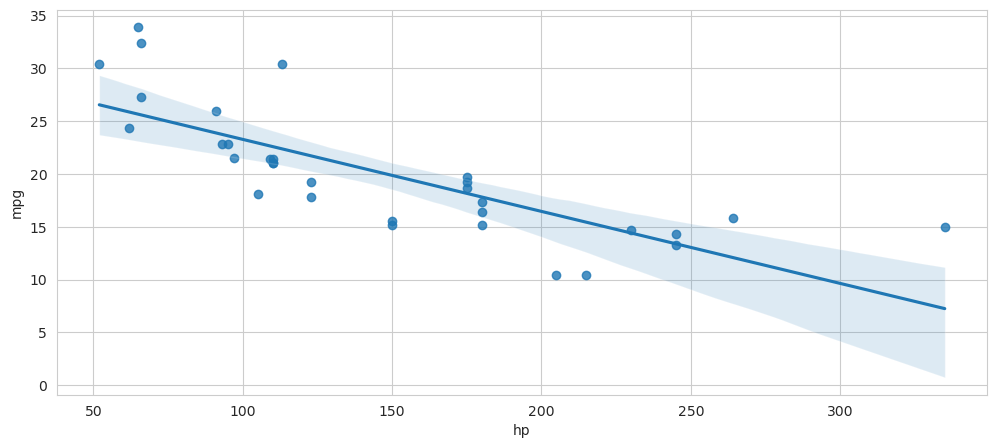

In [ ]:
# Seaborn for scatter

sns.regplot (x='hp', y='mpg', data=cars, scatter=True)

### Generating a scatterplot matrix

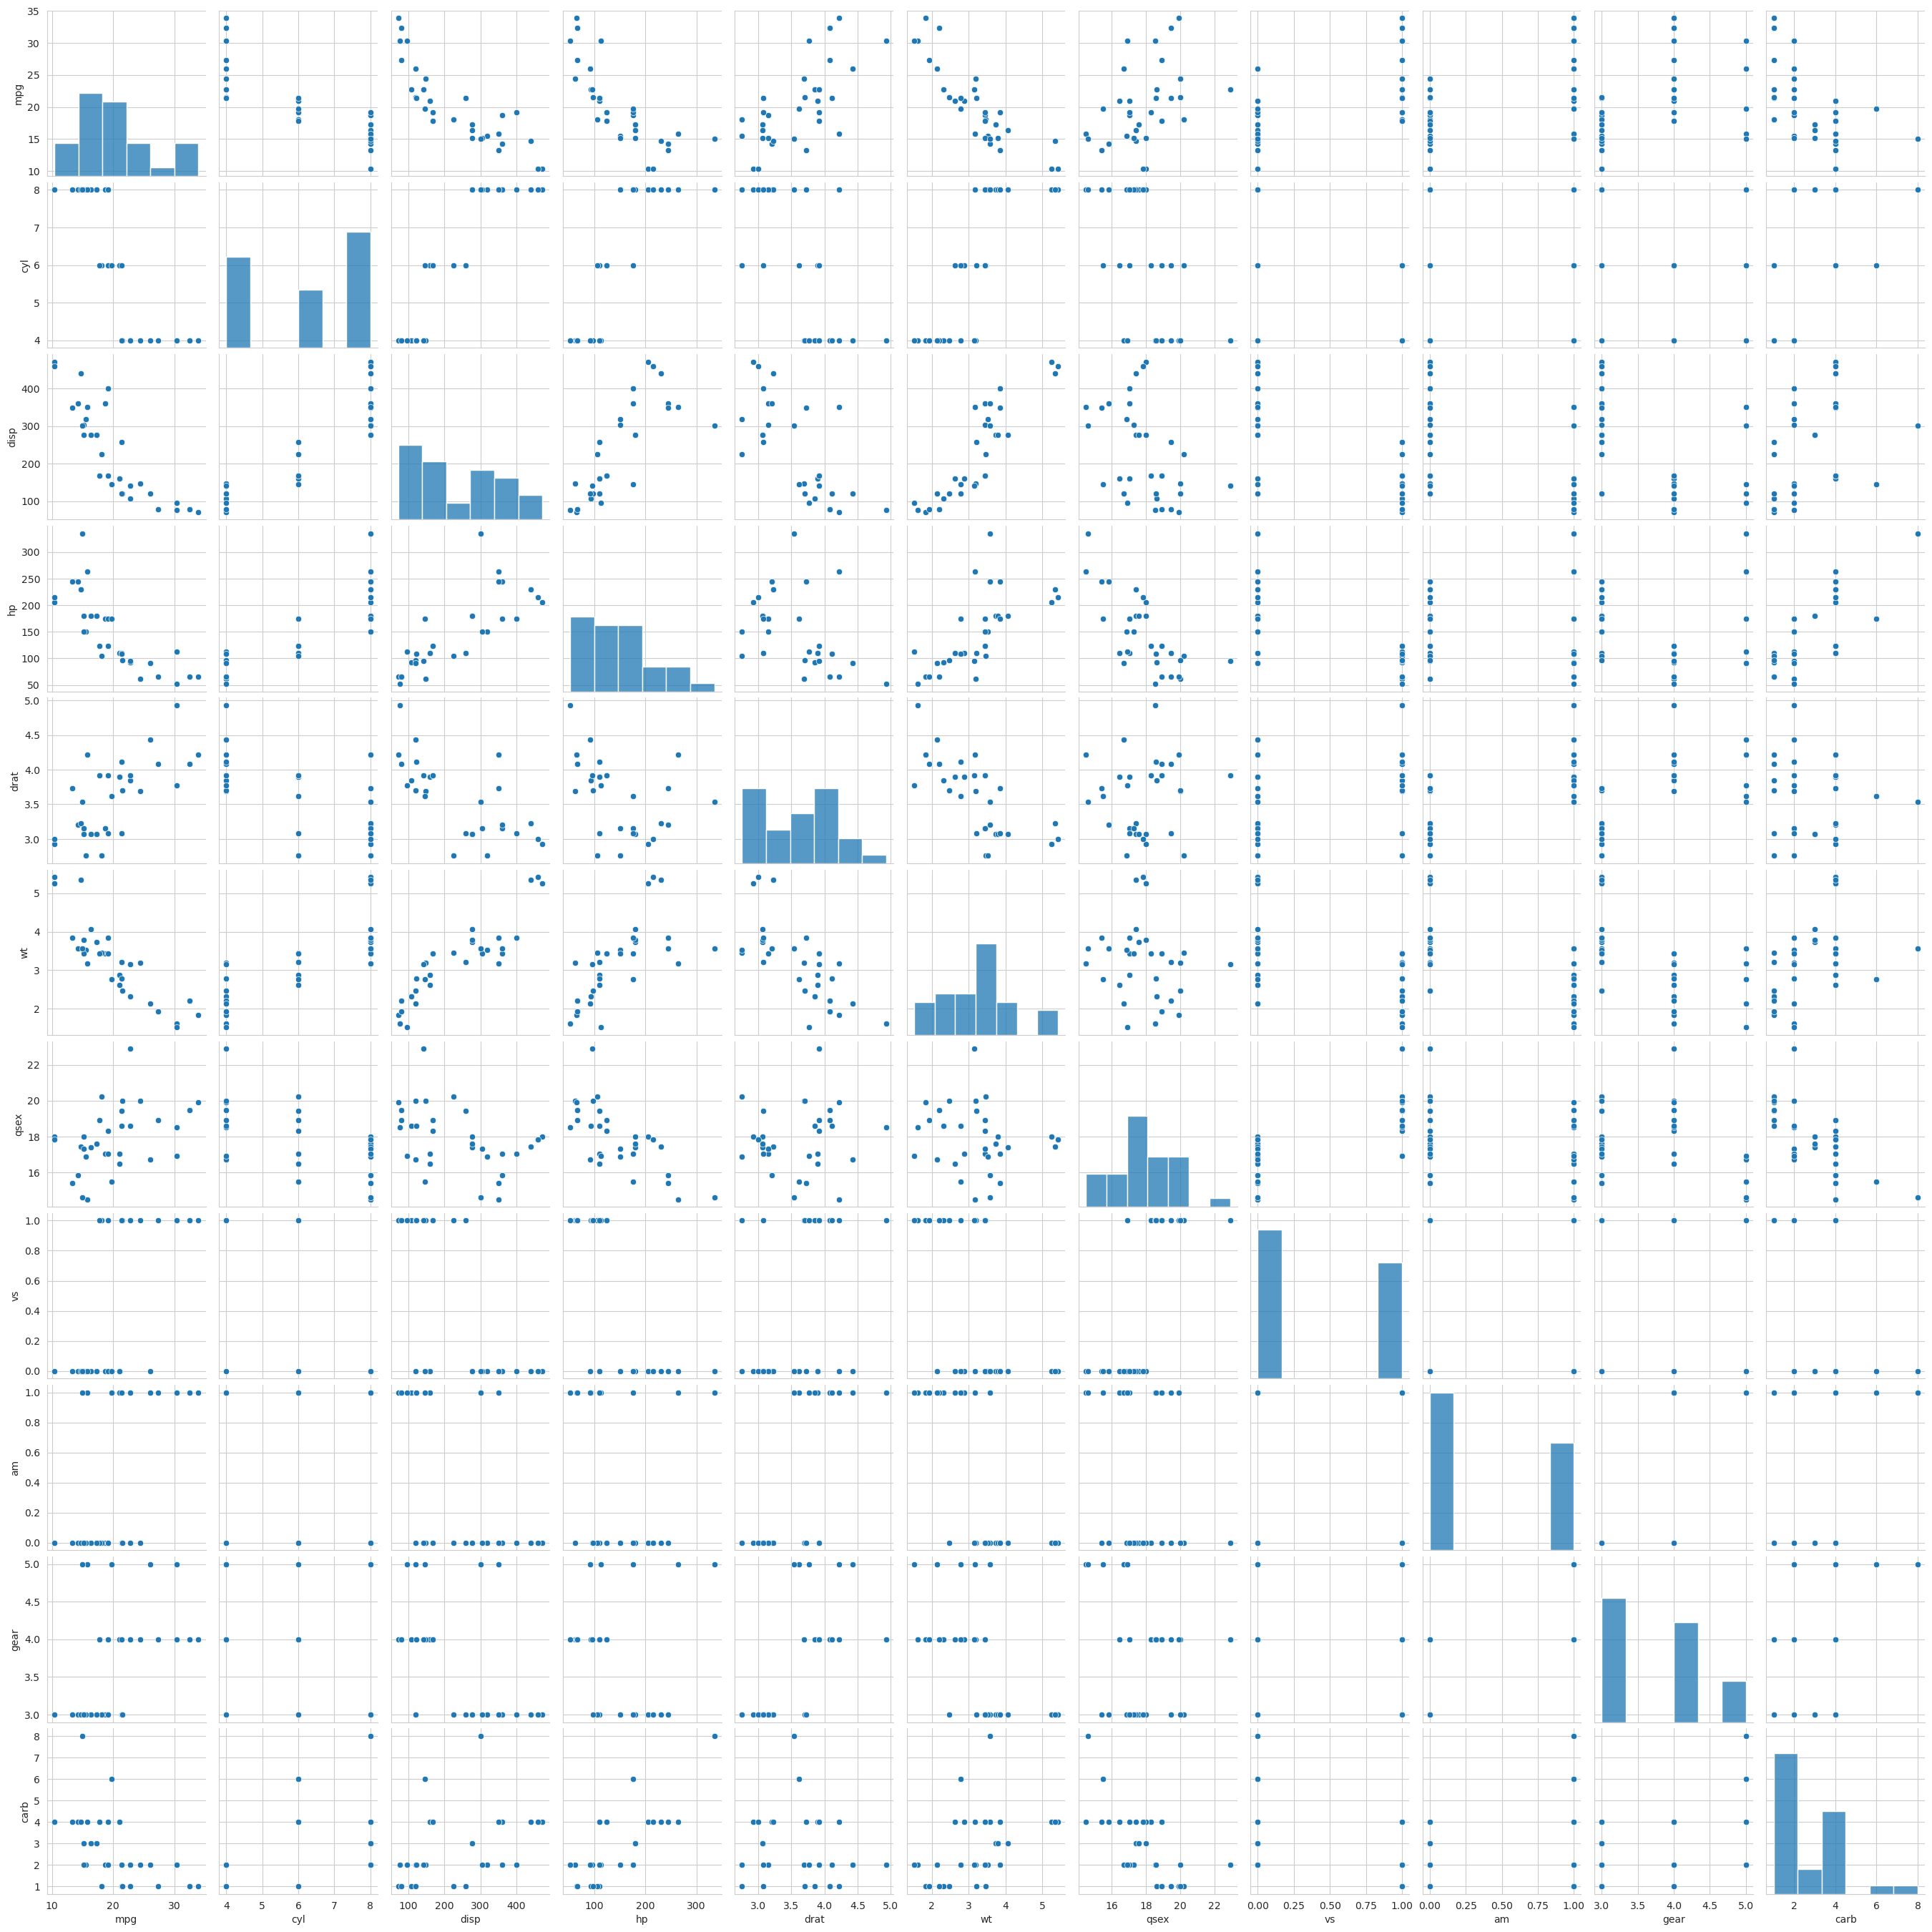

In [ ]:
# seaborn

sns.pairplot (data=cars)

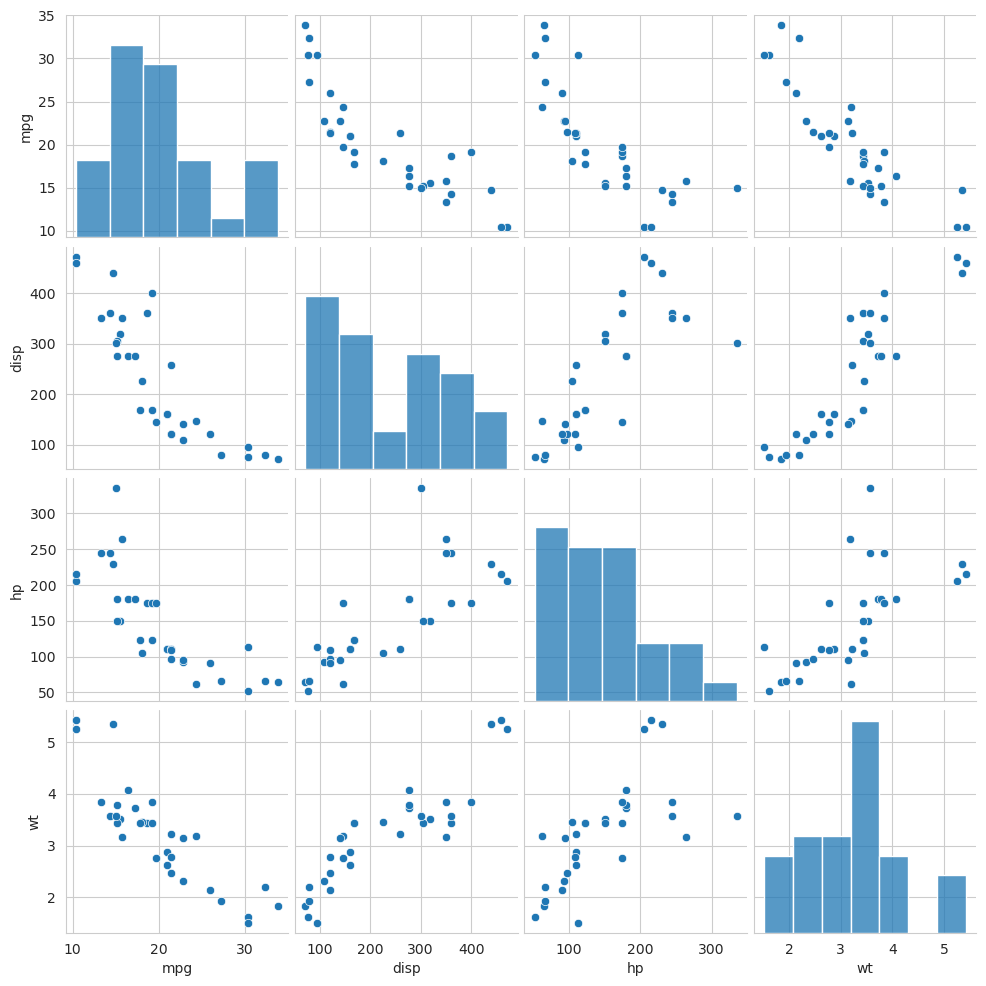

In [ ]:
cars_subset = cars[['mpg', 'disp', 'hp', 'wt']]

sns.pairplot (cars_subset)

### Building boxplot

<Axes: title={'center': 'wt'}, xlabel='am'>

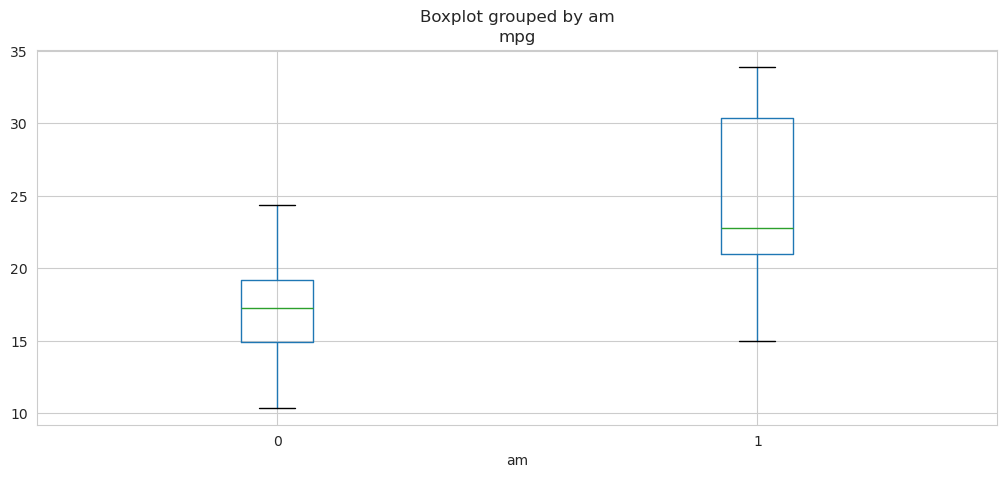

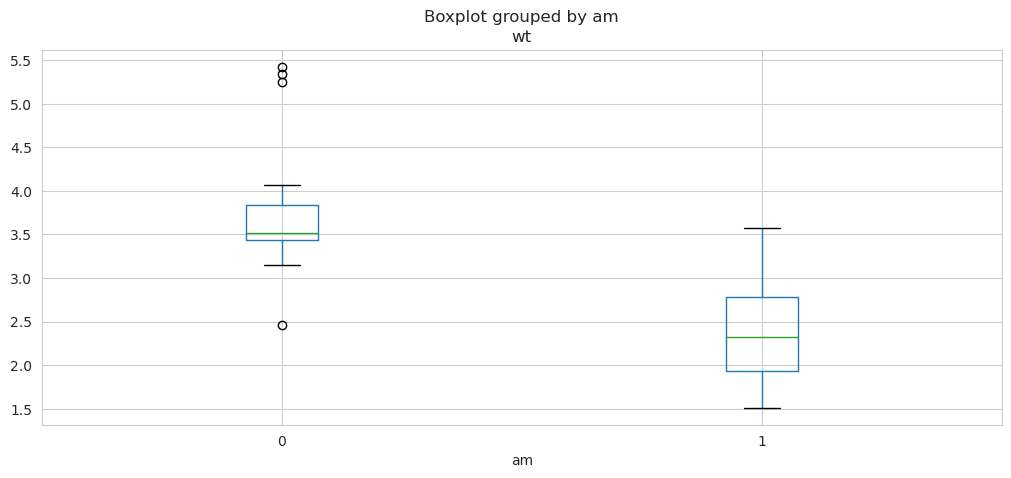

In [ ]:
cars.boxplot (column='mpg', by='am') #automatic transmission => am
cars.boxplot (column='wt', by='am')

<Axes: xlabel='am', ylabel='mpg'>

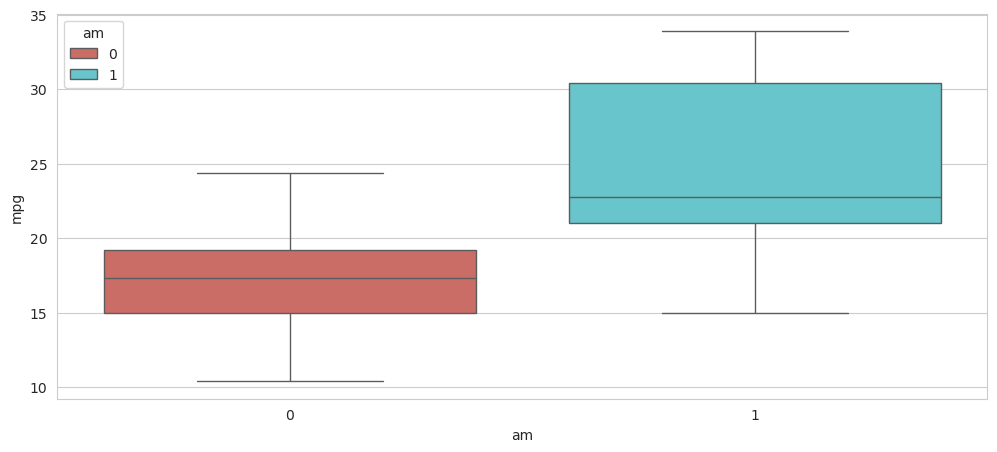

In [ ]:
# seaborn

sns.boxplot (x='am', y='mpg', data=cars, hue='am', palette='hls')



# Simple arithmetic

In [ ]:
np.set_printoptions(precision=2) # limit the number of decimals

### Creating arrays using a list

In [ ]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [ ]:
b = np.array ([[10,20,30],[40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

In [ ]:
### Creating arrays via assignment

In [ ]:
np.random.seed(25)  # just because to get same result as her

c = np.random.randn(6) # 6 values both in positive and negative
c

array([ 0.23,  1.03, -0.84, -0.59, -0.96, -0.22])

In [ ]:
d = np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [ ]:
a*10

array([10, 20, 30, 40, 50, 60])

In [ ]:
c + a

array([1.23, 3.03, 2.16, 3.41, 4.04, 5.78])

In [ ]:
c - a

array([-0.77, -0.97, -3.84, -4.59, -5.96, -6.22])

In [ ]:
c * a

array([ 0.23,  2.05, -2.52, -2.36, -4.78, -1.33])

In [ ]:
c / a

array([ 0.23,  0.51, -0.28, -0.15, -0.19, -0.04])

# Generating summary statistics using pandas and scipy

In [ ]:
import scipy
from scipy import stats

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Looking at summary statistics that decribe a variables's numeric values

In [ ]:
# sum column
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsex                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [ ]:
# sum rows by numeric values only
cars.sum(axis=1, numeric_only=True)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [ ]:
# median method

cars.median(numeric_only=True)

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsex     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [ ]:
# calculate mean

cars.mean(numeric_only=True)

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsex     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [ ]:
# max
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp              472.0
hp                  335
drat               4.93
wt                5.424
qsex               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [ ]:
# Id max method

mpg = cars['mpg']

mpg.idxmax()


# 19 index number of max vlue for mpg

19

### Looking at summary statistics that describe variable distribution

In [ ]:
# standard method

cars.std(numeric_only='True') # standard derviation for each column

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsex      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [ ]:
# calculate variance

cars.var(numeric_only=True)

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsex        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [ ]:
# gears variable

gear = cars.gear
gear.value_counts()

# left side says there are 3 unique values and right side says unique counts 

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [ ]:
# describe methon

cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# Categorical Variable

### Summarizing categorical data using pandas

The basics

In [ ]:
cars.index = cars.car_names

In [ ]:
cars.head(15)

,car_names,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
# values count mehthod

carb = cars.carb
carb.value_counts()

# 10 cars have 4 carborator

carb
4    10
2    10
1     7
3     3
6     1
8     1
Name: count, dtype: int64

In [ ]:
# group by method

# subset of orginal dataset
cars_cat = cars [['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [ ]:
# group by gear variable

gear_group = cars_cat.groupby ('gear')

gear_group.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

### Transforming variables to vategorical data type

In [ ]:
# add new column and transform gear column to searies

cars ['group'] = pd.Series(cars.gear, dtype='category')

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb,group
car_names,,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


In [ ]:
# dtypes method

cars ['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False, categories_dtype=int64)

In [ ]:
# distrbution 
cars ['group'].value_counts()

group
3    15
4    12
5     5
Name: count, dtype: int64

### Describing categorical data with crosstabs

In [ ]:
pd.crosstab(cars['am'], cars['gear'])

# am stands for manual transmission 

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


# Parametric Correlation Analysis
## Starting with parametric methods in pandas and scipy

In [ ]:
from scipy.stats import pearsonr

### The pearson Correlation

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsec' , 'vs' ,'am', 'gear' ,'carb']


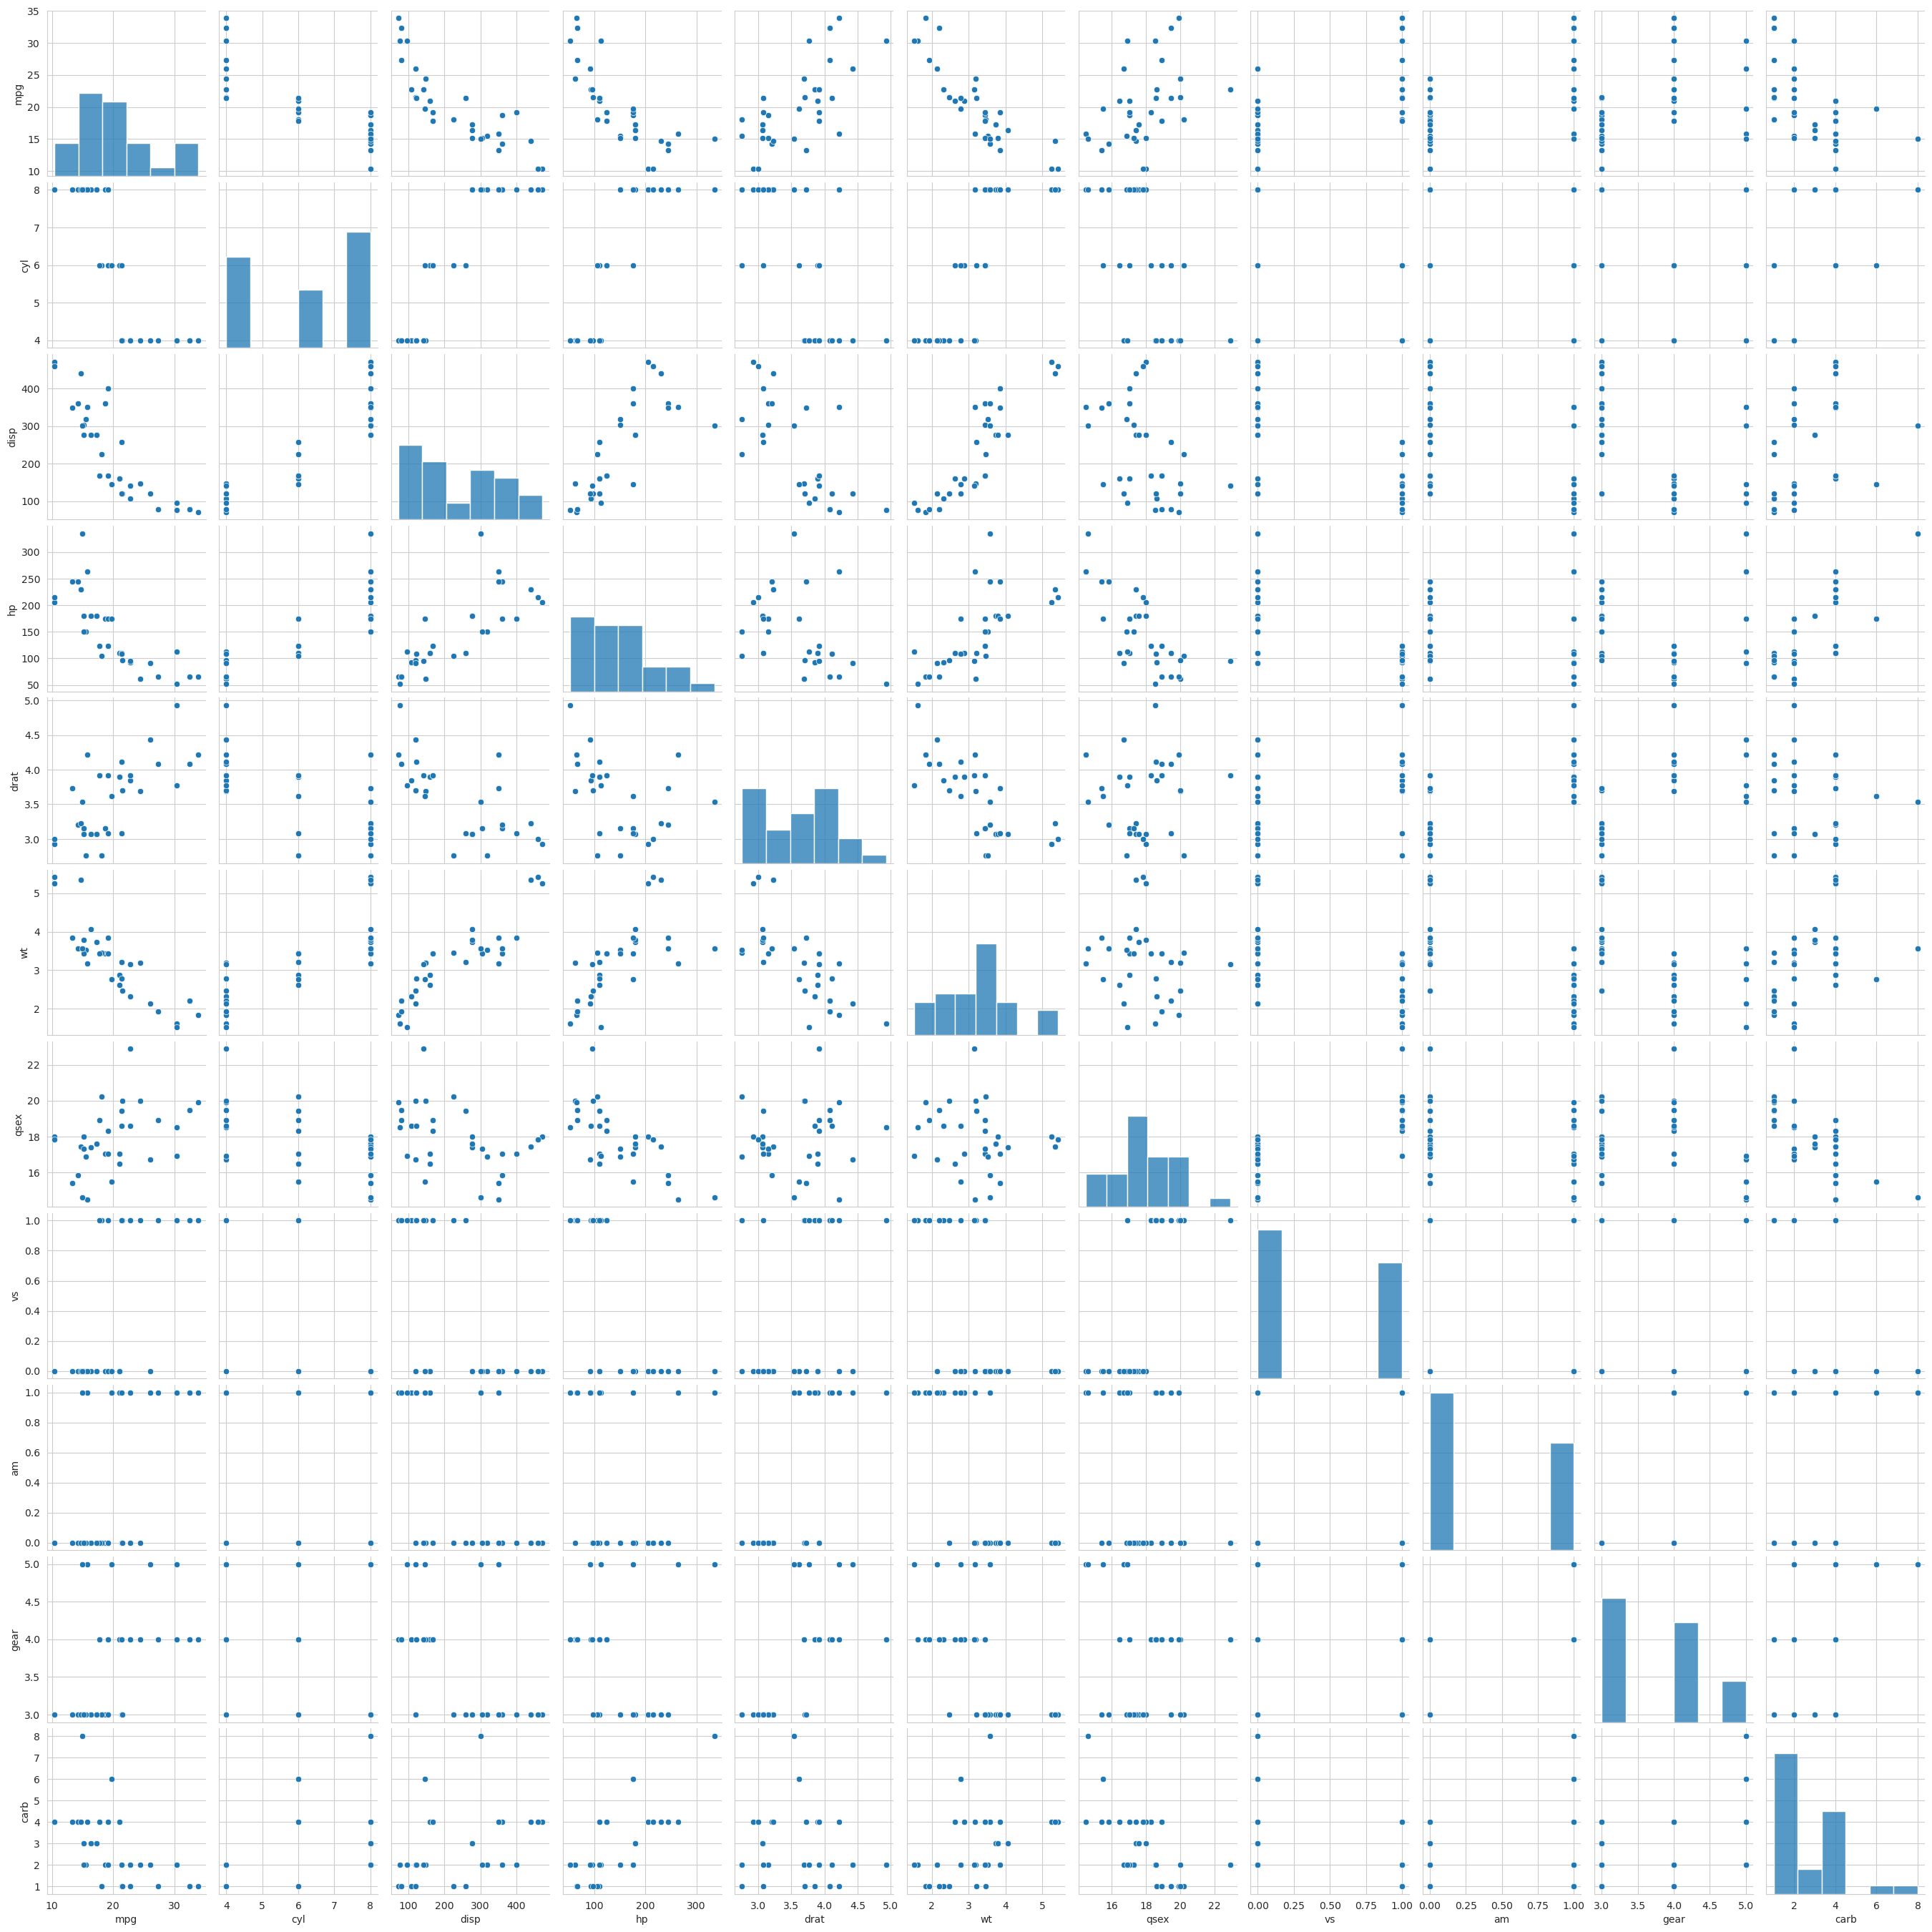

In [ ]:
sns.pairplot(cars)

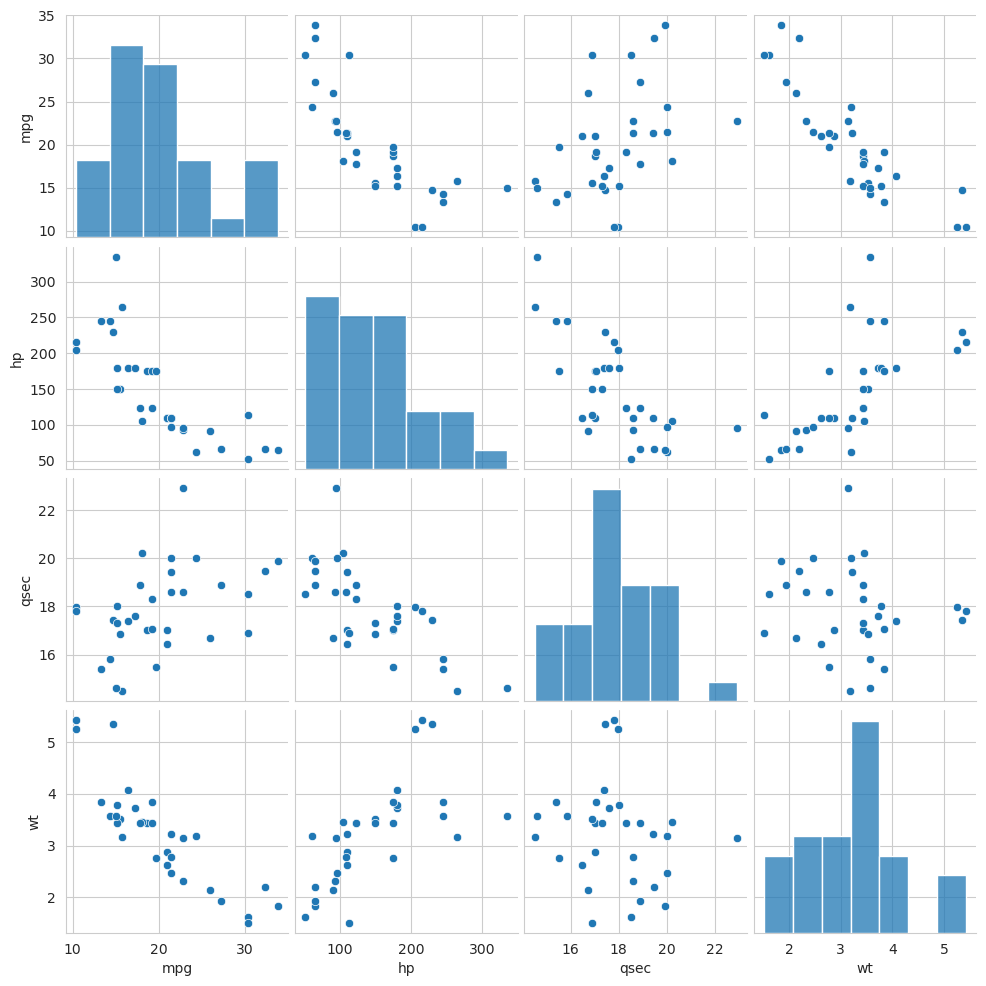

In [ ]:
x = cars[['mpg', 'hp', 'qsec', 'wt']]

sns.pairplot(x)

### Using scipy to calculate the pearson correlation coefficient


In [ ]:
mpg = cars ['mpg']
hp = cars ['hp']
qsec = cars ['qsec']
wt = cars ['wt']

pearsonr_coefficient , p_value =pearsonr(mpg,hp)
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.776


In [ ]:
pearsonr_coefficient , p_value =pearsonr(mpg,qsec)
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.419


In [ ]:
pearsonr_coefficient , p_value =pearsonr(mpg,wt)
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.868


### Using pandas to calculate the pearson correlation coefficient


In [ ]:
corr = x.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


### Using Seaborn to visualize the pearson correlation coefficient

<Axes: >

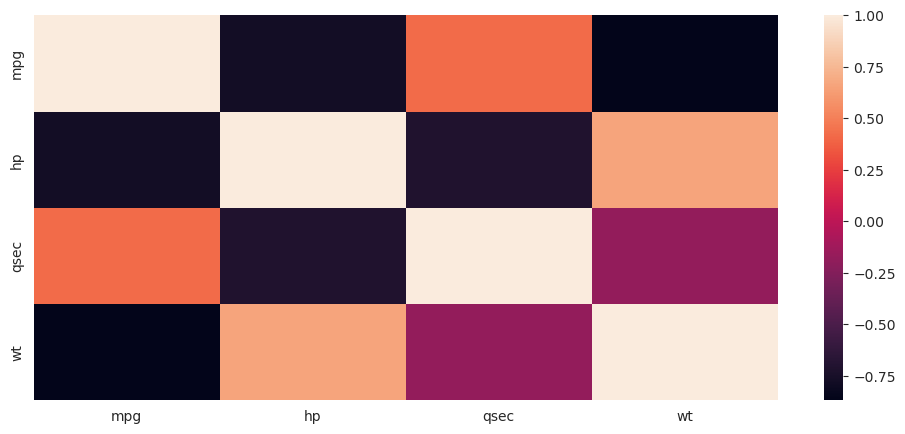

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# The darker shade of red indicate a strong dgree of positive corralation 

# Delving into non-parametric methods using pandas and scipy

In [ ]:
from scipy.stats import spearmanr

### The Spearman Rank Correlation

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsec' , 'vs' ,'am', 'gear' ,'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


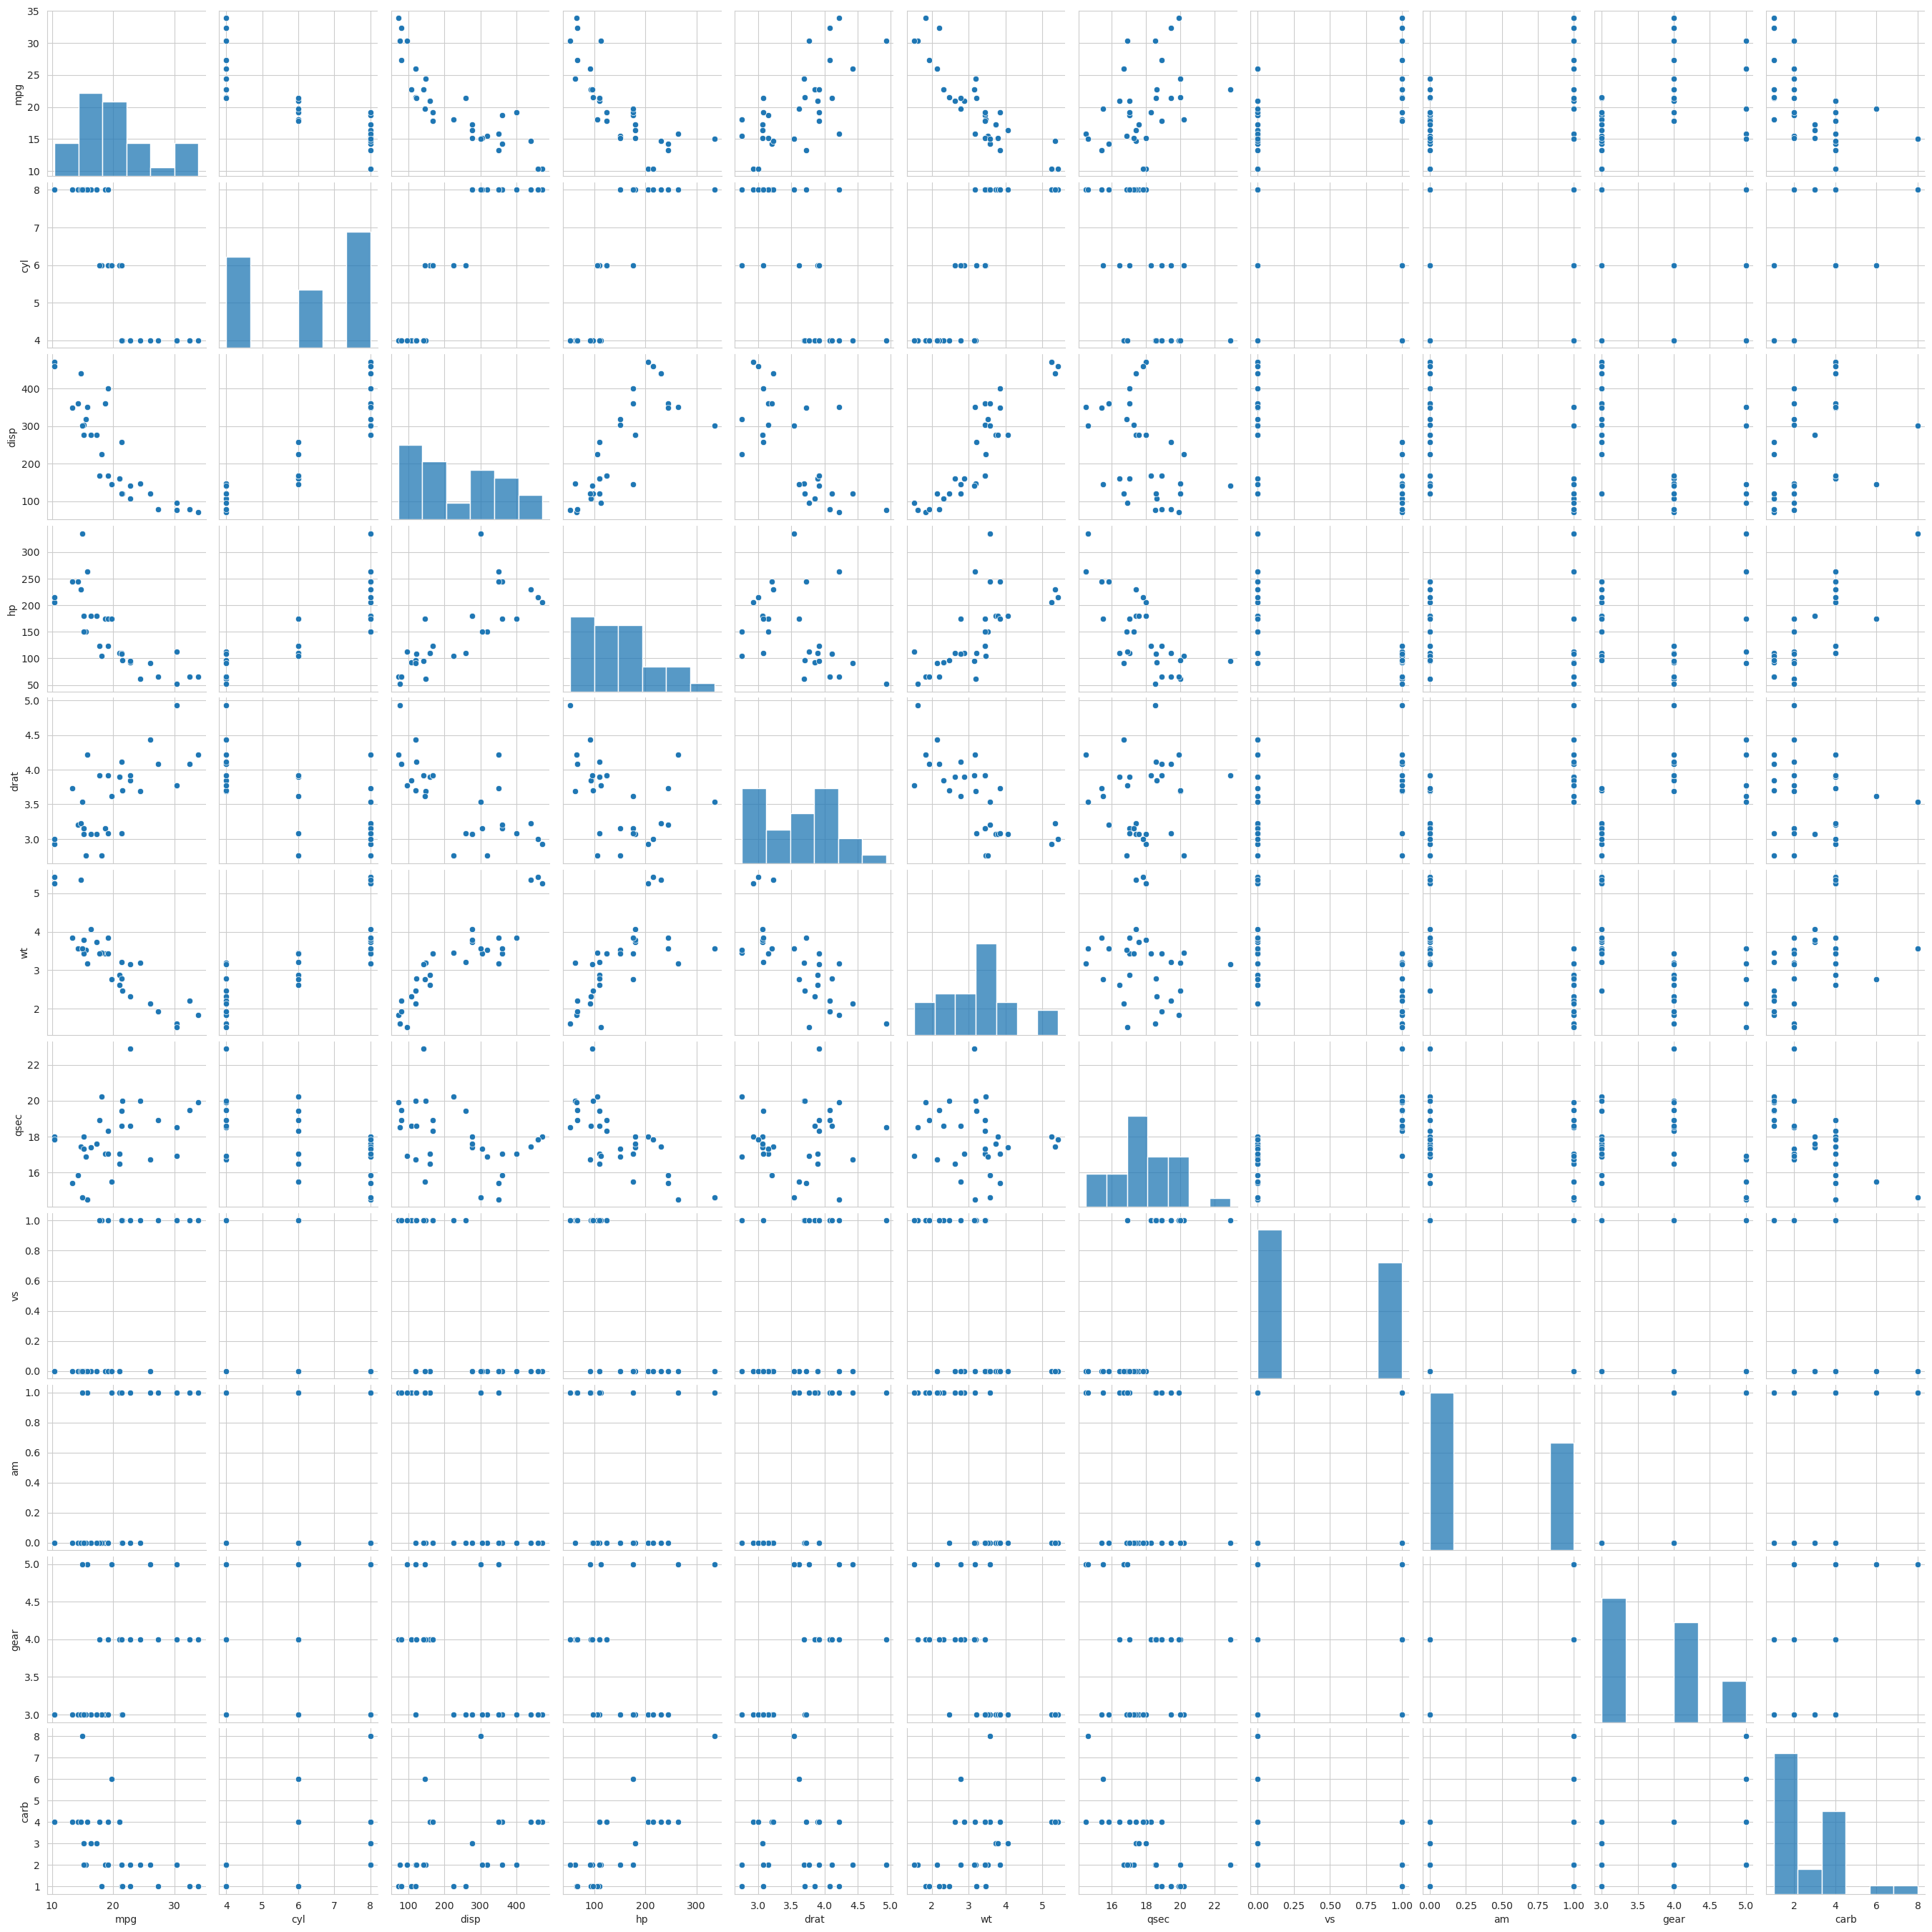

In [ ]:
sns.pairplot(cars)

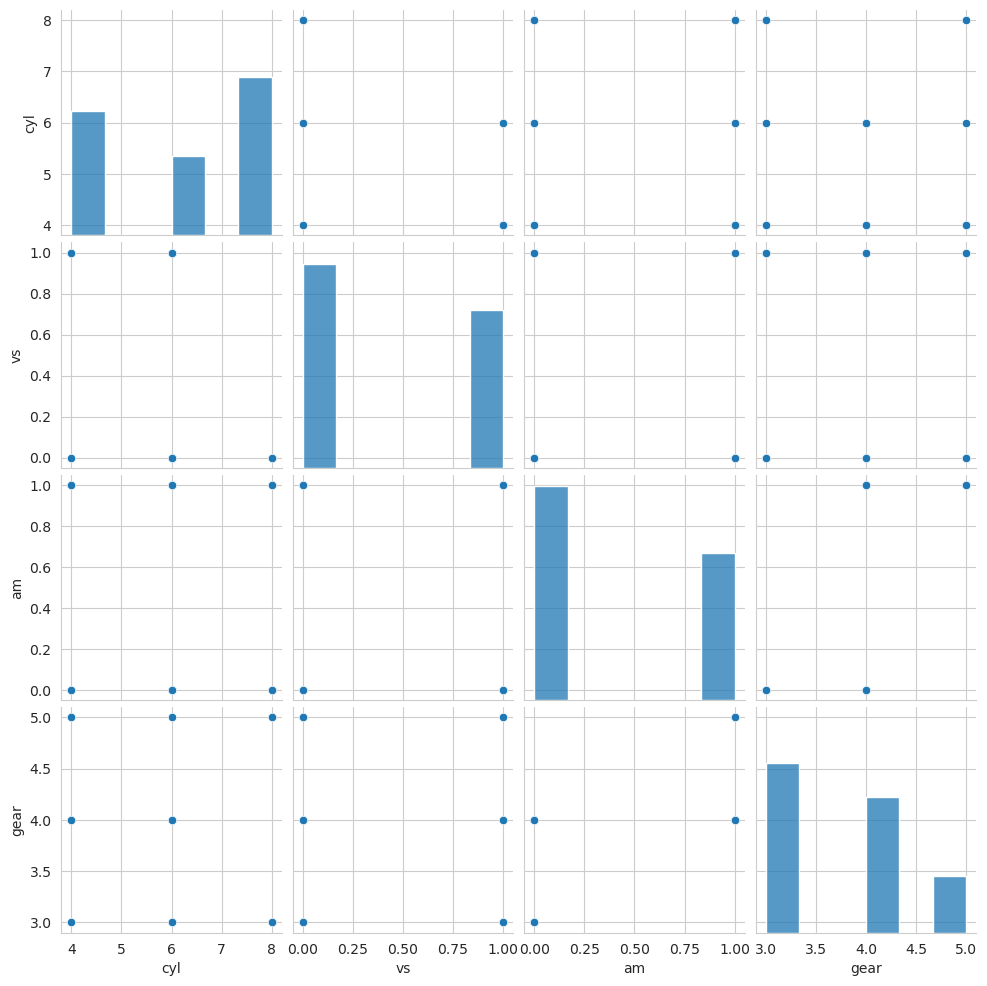

In [ ]:
x = cars[['cyl', 'vs', 'am', 'gear']]

sns.pairplot(x)
# There are ordinal variables and numeric
# they are nonlinearly related 
# They are nonnormal 


In [ ]:
cyl = cars ['cyl']
vs = cars ['vs']
am = ['am']
gear = cars ['gear']

spearmanr_coefficient , p_value =spearmanr(cyl, vs)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


In [ ]:
spearmanr_coefficient , p_value =spearmanr(cyl, am)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

In [ ]:
spearmanr_coefficient , p_value =spearmanr(cyl, gear)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

In [ ]:
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency

#  place holders for ouputs

chi2, p, dof, expected = chi2_contingency(table.values)

print ('Chi-square Statistic % 0.3f p_value %0.3f' % (chi2, p) )

Chi-square Statistic  0.000 p_value 1.000


In [ ]:
table = pd.crosstab(cyl, vs)

chi2, p, dof, expected = chi2_contingency(table.values)

print ('Chi-square Statistic % 0.3f p_value %0.3f' % (chi2, p) )

Chi-square Statistic  21.340 p_value 0.000


In [ ]:
table = pd.crosstab(cyl, gear)

chi2, p, dof, expected = chi2_contingency(table.values)

print ('Chi-square Statistic % 0.3f p_value %0.3f' % (chi2, p) )

Chi-square Statistic  18.036 p_value 0.001


### Extreme value analysis for outliers (Using univariate methods)

In [589]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/iris.data.csv'

df = pd.read_csv(filepath_or_buffer=address, header=None, sep=',')

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

x = df.iloc[:,0:4].values # only first 4 columns

y = df.iloc[:,4].values # only select values in index postion 4

df[:5]


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Identifying outliers from Turkey boxplots

[]

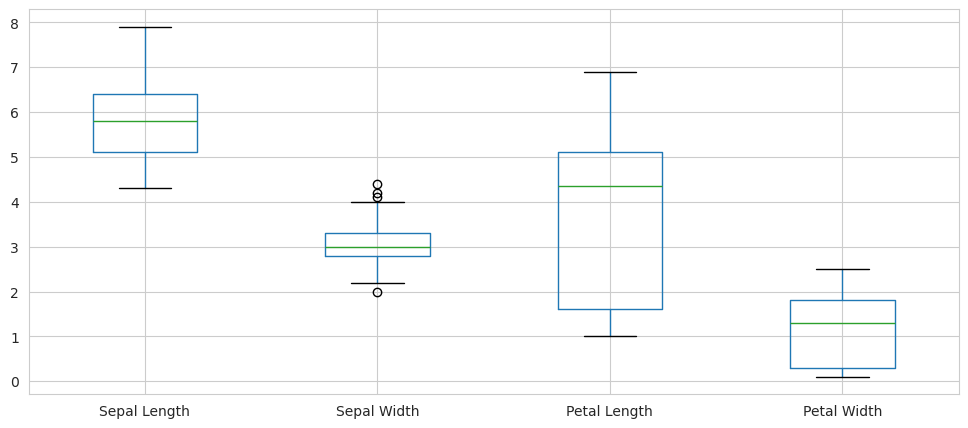

In [590]:
df.boxplot(return_type='dict')
plt.plot()

In [596]:
# Isolate Sepal Width
sepal_width = x[:,1]
iris_outliers = (sepal_width>4)

df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [593]:
sepal_width = x[:,1]
iris_outliers = (sepal_width<2.05)

df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


### Applying Turkey outlier labeling

In [601]:
pd.options.display.float_format ='{:.1f}'.format
X_df = pd.DataFrame(x)
print (X_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


# Multivariate analysis for outliers

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/iris.data.csv'

df = pd.read_csv(filepath_or_buffer=address, header=None, sep=',')

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

x = df.iloc[:,0:4].values # only first 4 columns

y = df.iloc[:,4].values # only select values in index postion 4

df[:5]


<Axes: xlabel='Species', ylabel='Sepal Length'>

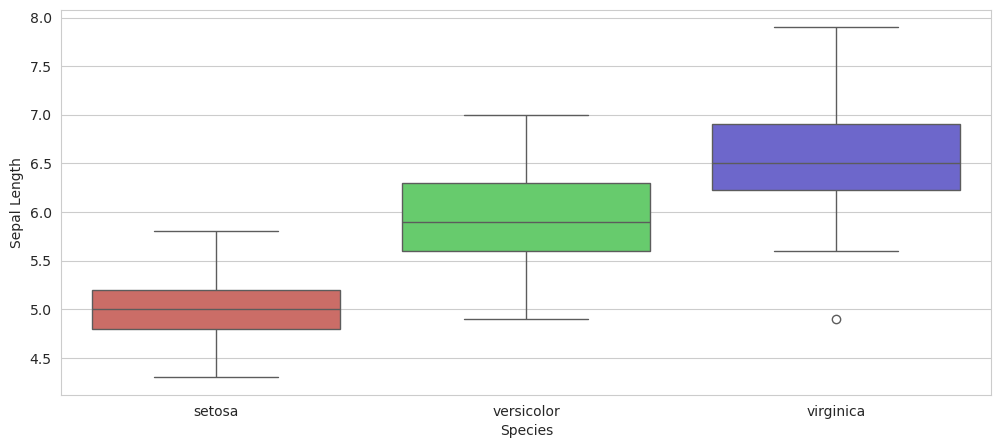

In [605]:
sns.boxplot(x='Species', y='Sepal Length', data=df, hue='Species', palette='hls', legend=False )

### Looking at the scatterplot matrix

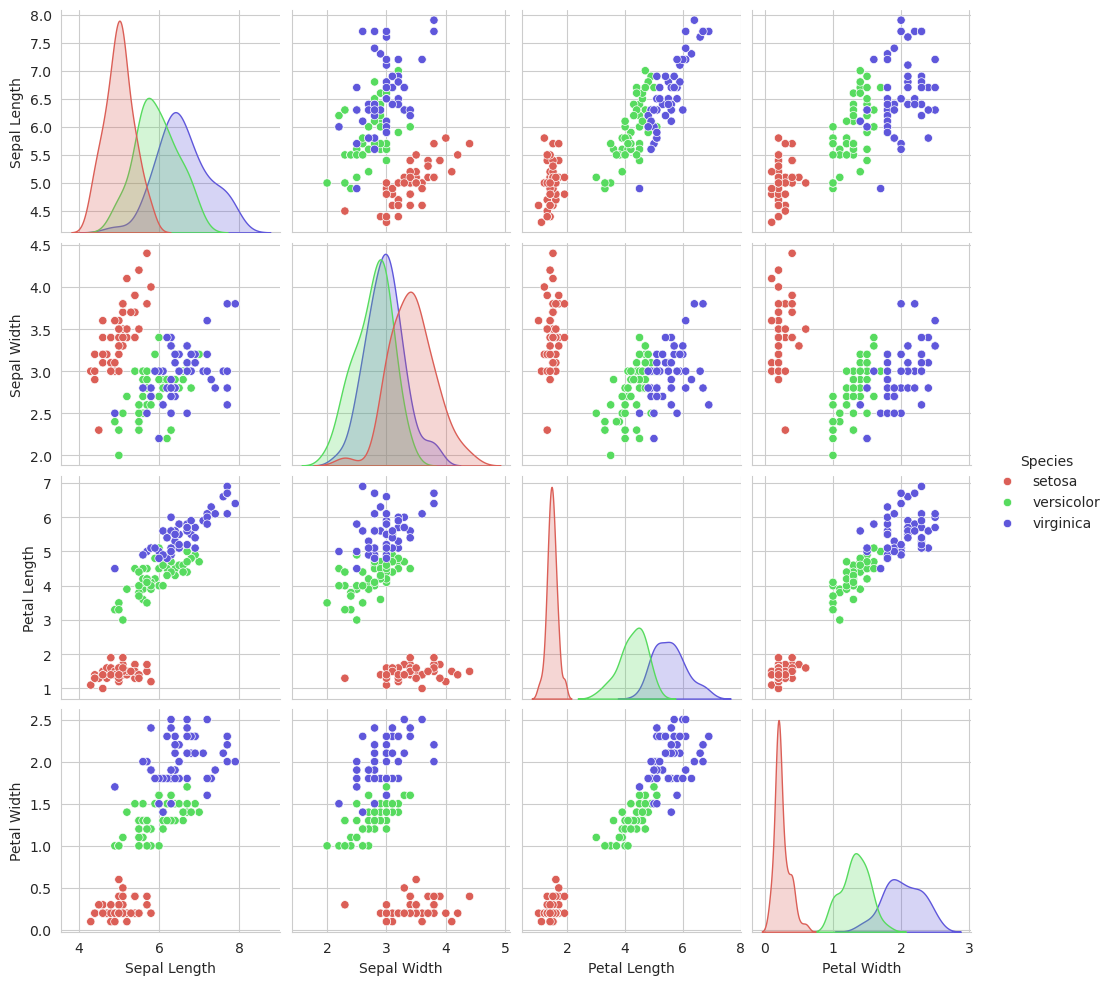

In [606]:
sns.pairplot(df, hue='Species', palette='hls')

### Applying Turkey outlier labeling

In [607]:
pd.options.display.float_format= '{:.1f}'.format

X_df = pd.DataFrame(x)
print (X_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5
